In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                 
import seaborn as sns                      
import pandas as pd                   
import numpy as np 

### LEVEL 0: UNDERSTANDING DATA

In [2]:
df=pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
#names of all column
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [4]:
#data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [5]:
#null values in column
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

## LEVEL 1: ANALYSIS

In [6]:
#seperating categorical and continuous coulumns
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 100:       
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 
categorical, continuous = seprate_data_types(df)   
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## Univariate analysis of categorical columns

### User defined function for getting information of categorical columns

In [7]:
def get_info_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is: {df[col].isnull().sum()}")

### Analysis on target column

In [8]:
get_info_cat('TARGET')

Unique values in TARGET are: [1 0]
Mode of TARGET is: 0
Number of missing values in TARGET is: 0


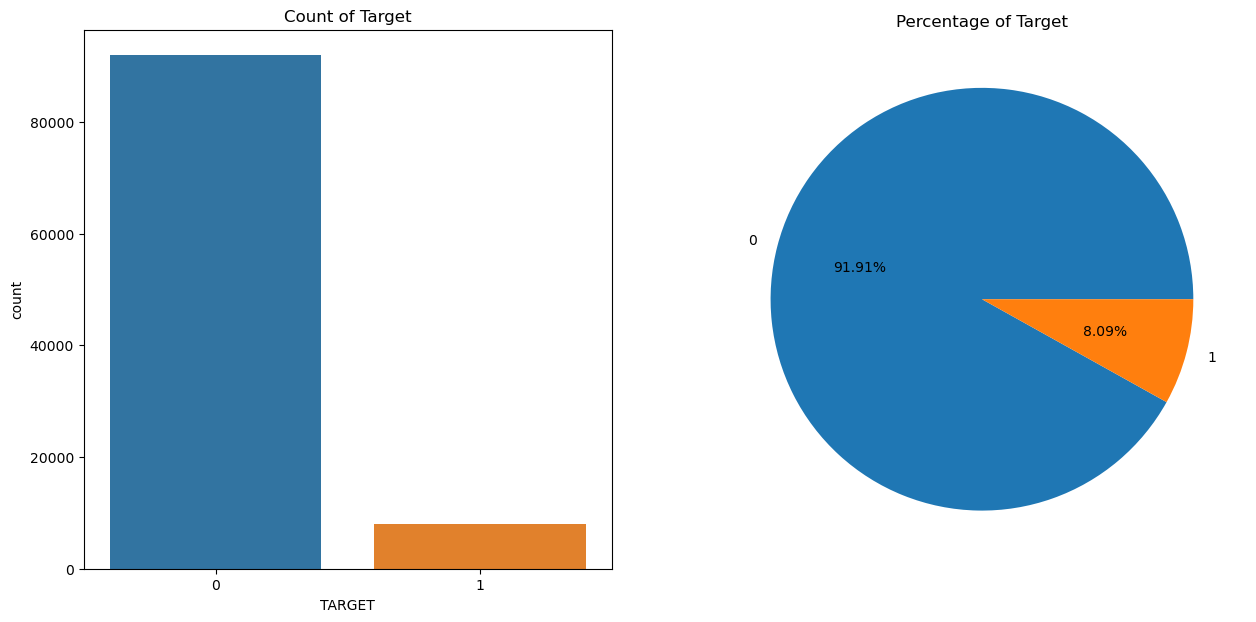

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Target")  
ax[1].set_title("Percentage of Target") 
percentage = df["TARGET"].value_counts()         
labels = list(df["TARGET"].value_counts().index) 
sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### INTERPRETATION: As we can see in above graph there are 8.09% customers who have payment difficulties.     So we can say that these clients have a higher probability of becoming defaulters.

In [10]:
get_info_cat('NAME_CONTRACT_TYPE')

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is: Cash loans
Number of missing values in NAME_CONTRACT_TYPE is: 0


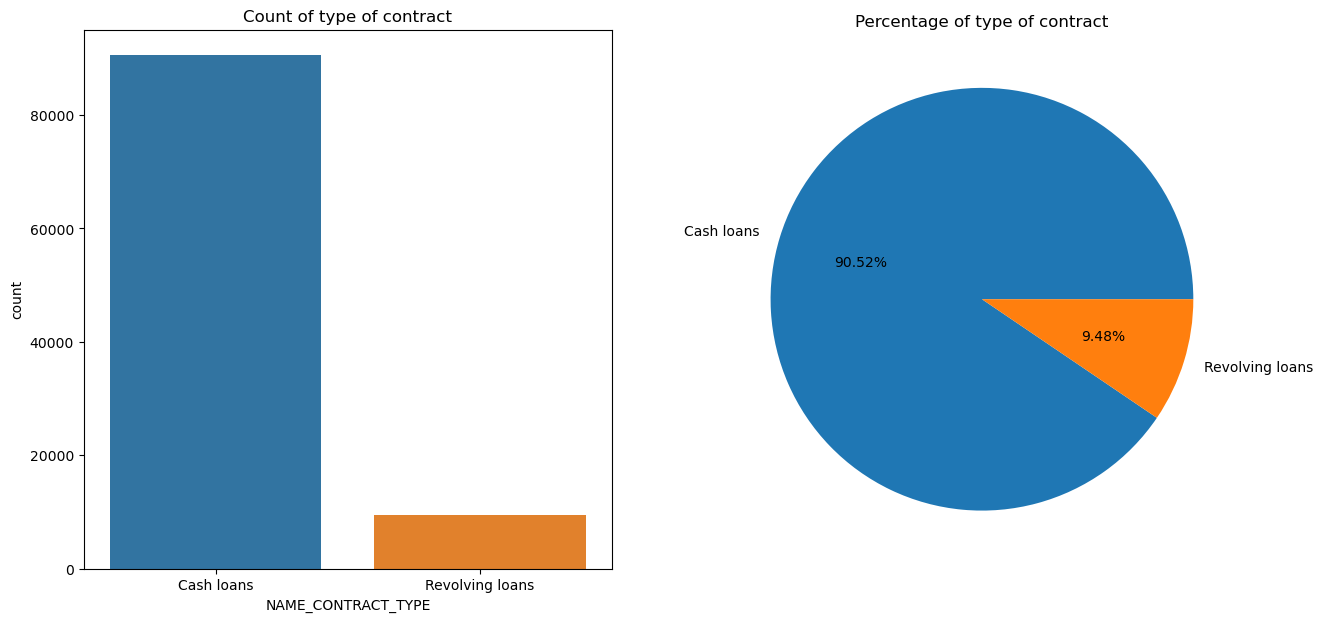

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of type of contract")  
ax[1].set_title("Percentage of type of contract") 
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) 
sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

### INTERPRETATION: As we can see in above graph there are 90.52% clients whose contract type is cash loans. 

### Analysis on Gender column

In [12]:
get_info_cat('GENDER')

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is: F
Number of missing values in GENDER is: 0


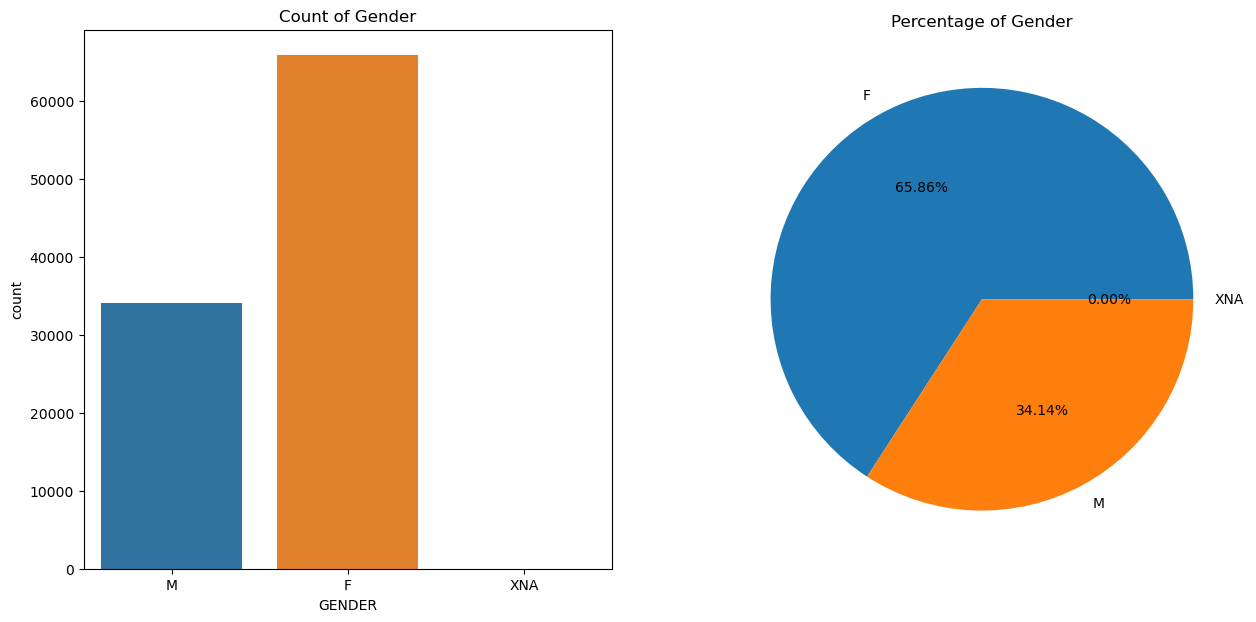

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Gender") 
ax[1].set_title("Percentage of Gender") 
percentage = df["GENDER"].value_counts()         
labels = list(df["GENDER"].value_counts().index) 
sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Female clients are more in number, contributing to 65.86%.

### Analysis on car column

In [14]:
get_info_cat('Car')

Unique values in Car are: ['N' 'Y']
Mode of Car is: N
Number of missing values in Car is: 0


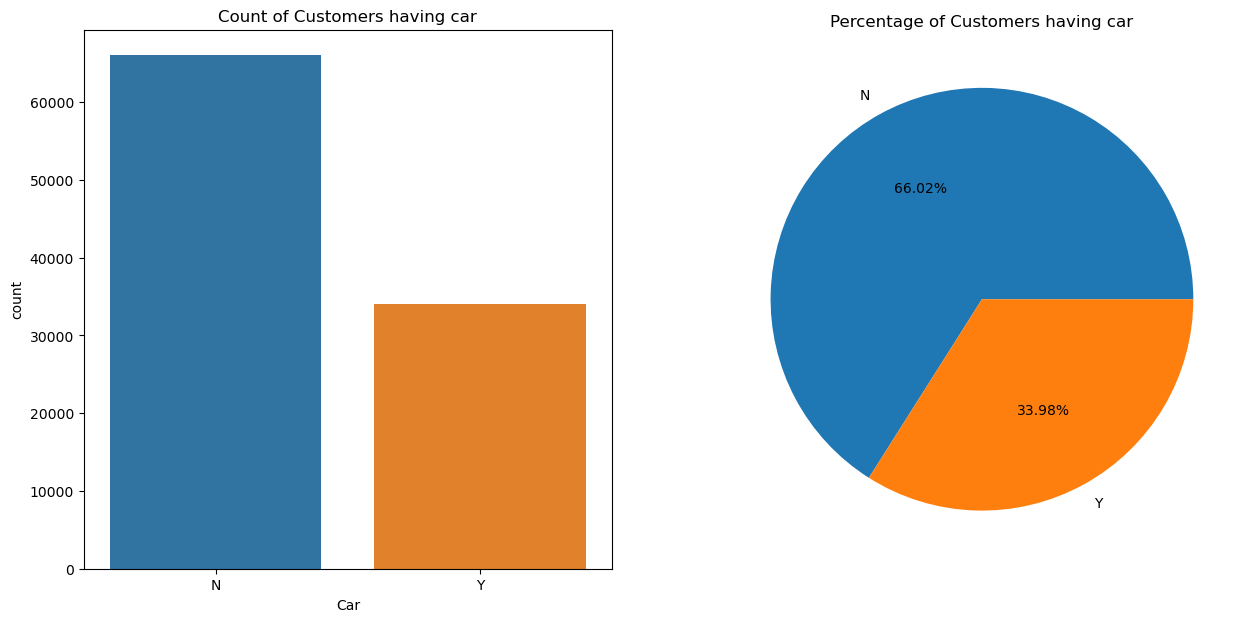

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers having car")
ax[1].set_title("Percentage of Customers having car") 
percentage = df["Car"].value_counts()         
labels = list(df["Car"].value_counts().index) 
sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Clients having no car is more in number, contributing to 66.02%.

### Analysis on House column

In [16]:
get_info_cat('House')

Unique values in House are: ['Y' 'N']
Mode of House is: Y
Number of missing values in House is: 0


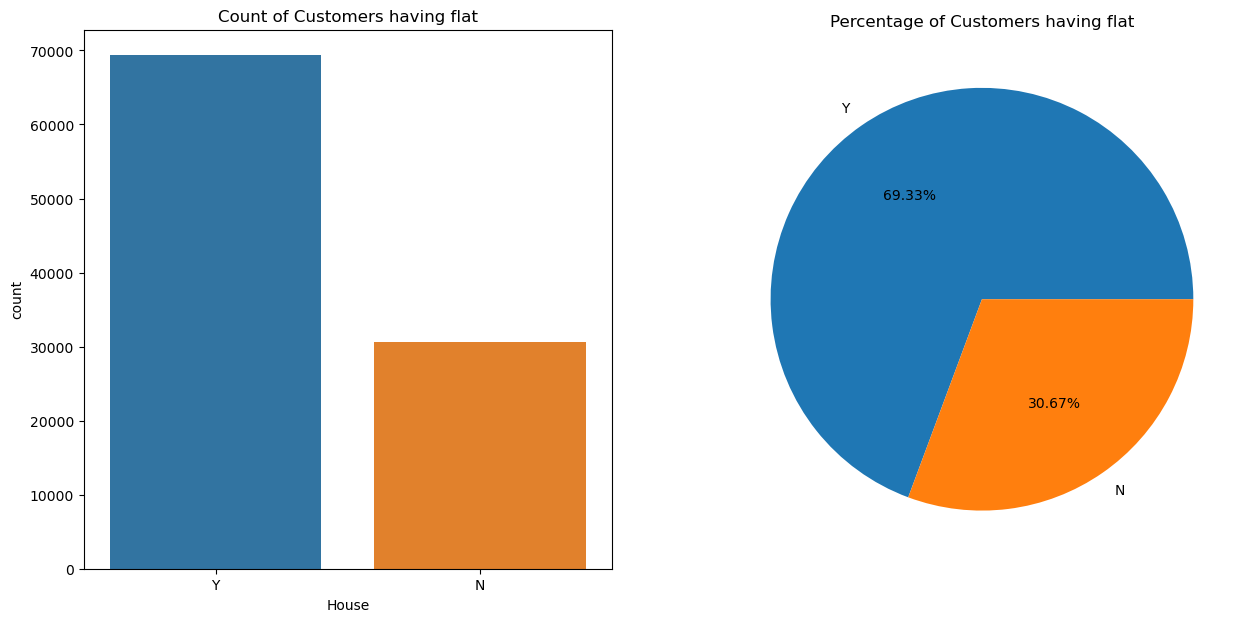

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers having flat")  
ax[1].set_title("Percentage of Customers having flat")
percentage = df["House"].value_counts()         
labels = list(df["House"].value_counts().index) 
sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients owns a flat, contributing to 69.33%.

### Analysis of CNT_CHILDREN column

In [18]:
get_info_cat('CNT_CHILDREN')

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is: 0
Number of missing values in CNT_CHILDREN is: 0


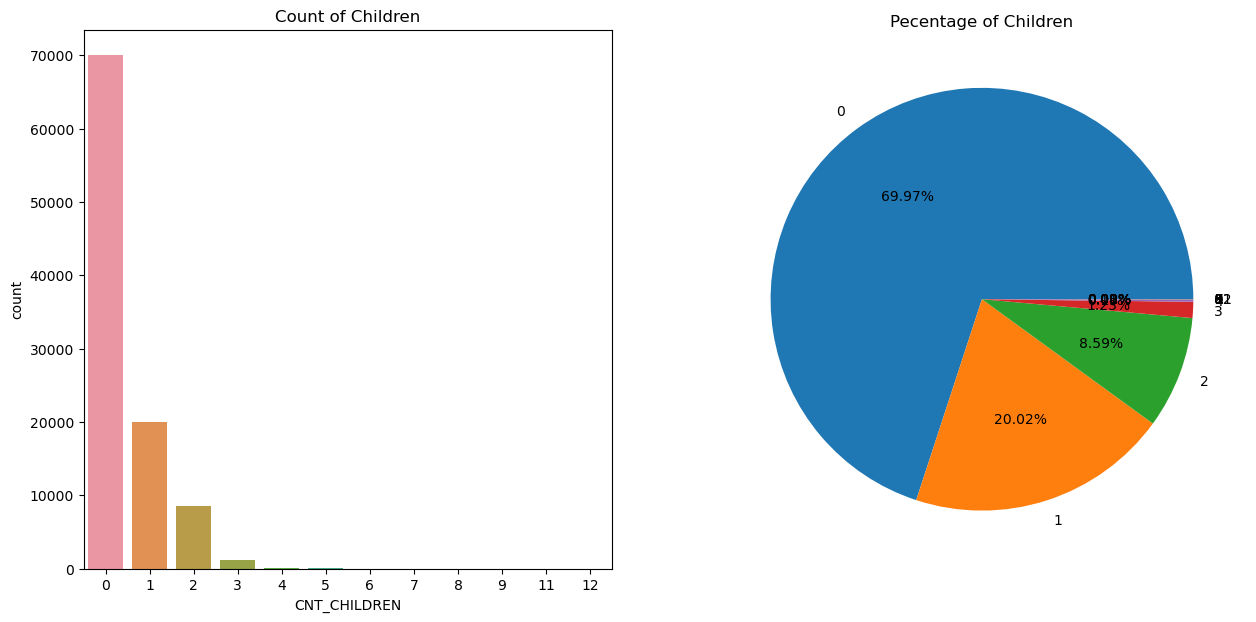

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Children") 
ax[1].set_title("Pecentage of Children") 
percentage = df["CNT_CHILDREN"].value_counts()         
labels = list(df["CNT_CHILDREN"].value_counts().index) 
sns.countplot(x = df["CNT_CHILDREN"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients have no children, contributing to 69.97%.

### Analysis of NAME_INCOME_TYPE column

In [20]:
get_info_cat('NAME_INCOME_TYPE')

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is: Working
Number of missing values in NAME_INCOME_TYPE is: 0


Working                 51.902
Commercial associate    23.217
Pensioner               17.857
State servant            7.000
Unemployed               0.010
Student                  0.009
Businessman              0.004
Maternity leave          0.001
Name: NAME_INCOME_TYPE, dtype: float64


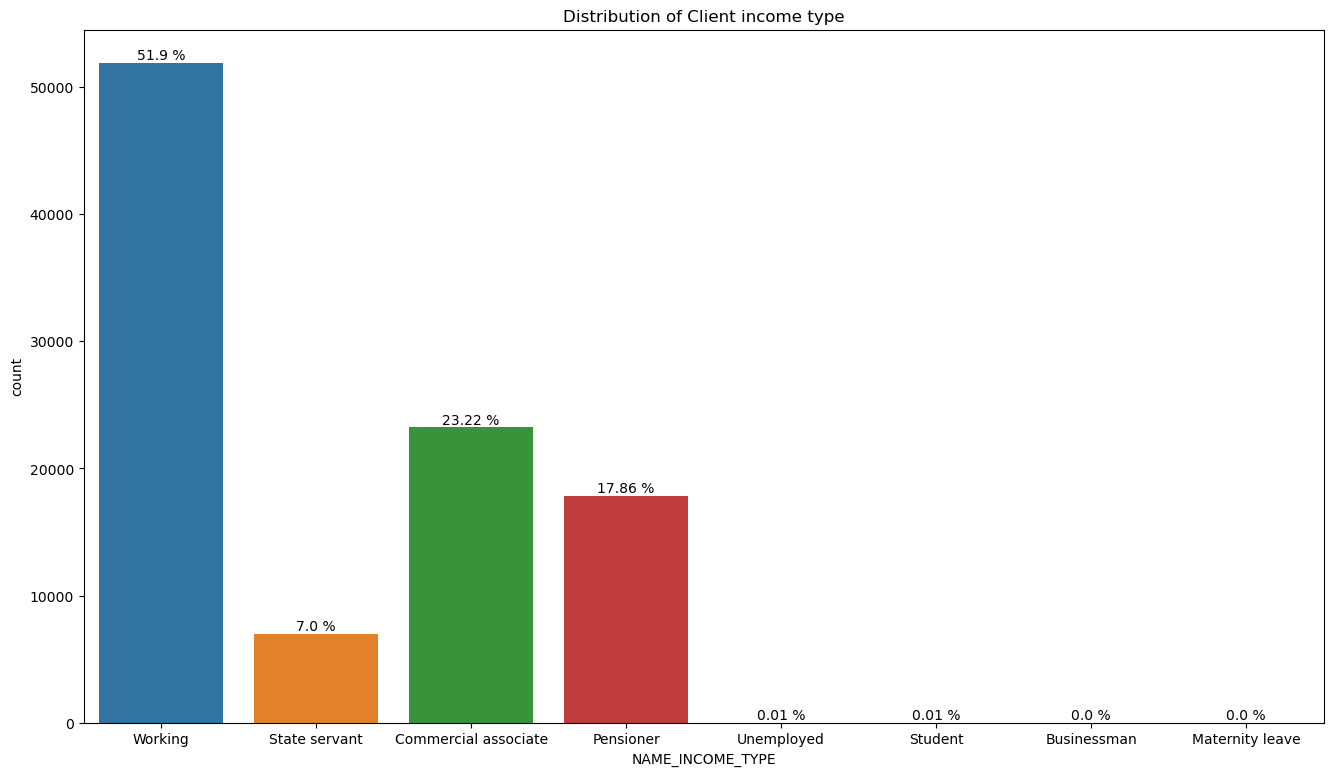

In [21]:
print((df["NAME_INCOME_TYPE"].value_counts()/len(df))*100)               
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = df[ 'NAME_INCOME_TYPE'], ax = ax)
for bar in ax.patches:                                                  
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
                                                                            
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" ) 
plt.title('Distribution of Client income type')
plt.show()

## ***Interpretation: Majority of clients have income type as working, contributing to 51.9%.

### Analysis of NAME_EDUCATION_TYPE column

In [22]:
get_info_cat('NAME_EDUCATION_TYPE')

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is: Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is: 0


Secondary / secondary special    71.068
Higher education                 24.399
Incomplete higher                 3.270
Lower secondary                   1.214
Academic degree                   0.049
Name: NAME_EDUCATION_TYPE, dtype: float64


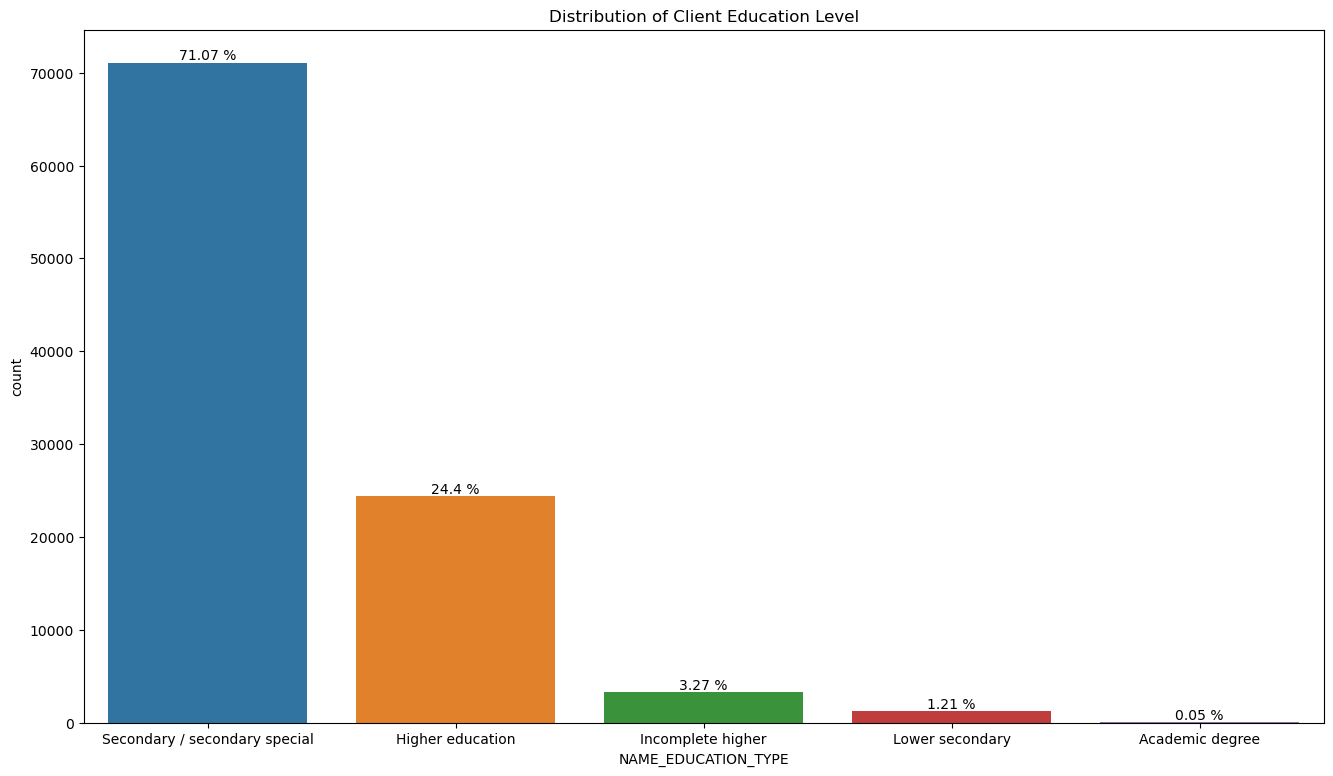

In [23]:
print((df["NAME_EDUCATION_TYPE"].value_counts()/len(df))*100)               
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = df[ 'NAME_EDUCATION_TYPE'], ax = ax)
for bar in ax.patches:                                                  
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
                                                                            
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" ) 
plt.title('Distribution of Client Education Level')
plt.show()

## ***Interpretation: Majority of clients have Secondary/Secondary special Education, contributing to 71.07%.

### Analysis of MOBILE column

In [24]:
get_info_cat('MOBILE')

Unique values in MOBILE are: [1 0]
Mode of MOBILE is: 1
Number of missing values in MOBILE is: 0


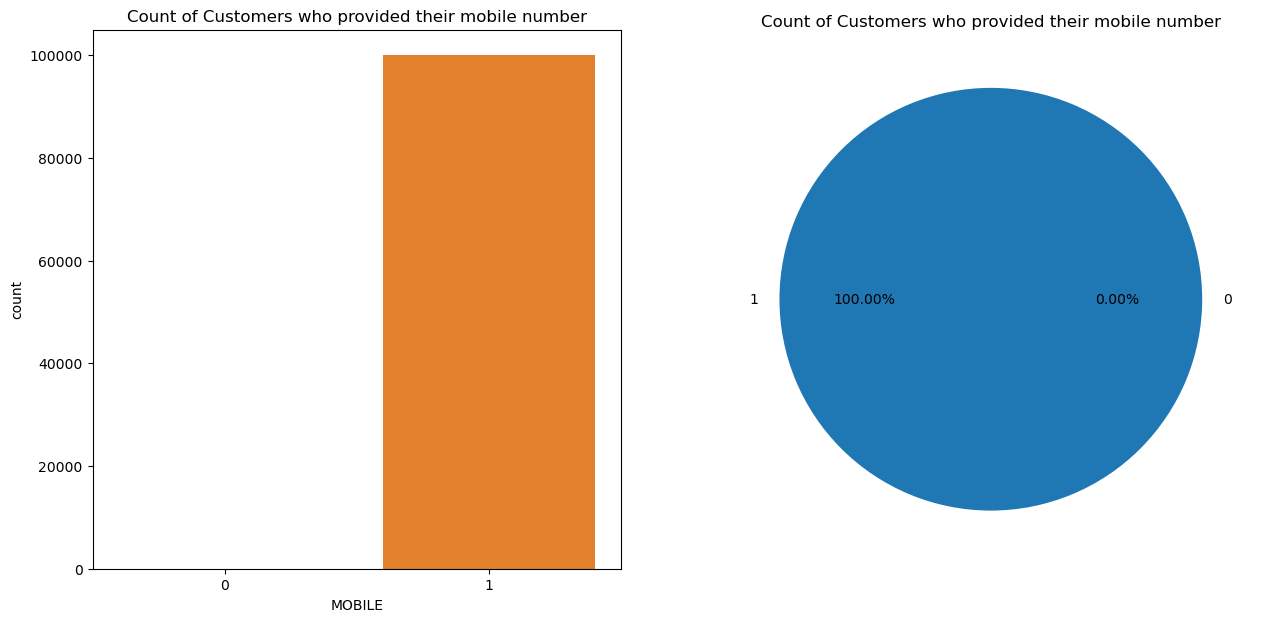

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers who provided their mobile number") 
ax[1].set_title("Count of Customers who provided their mobile number") 
percentage = df["MOBILE"].value_counts()         
labels = list(df["MOBILE"].value_counts().index) 
sns.countplot(x = df["MOBILE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: All clients have provided their mobile number

### Analysis of WORK_PHONE column

In [26]:
get_info_cat('WORK_PHONE')

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is: 1
Number of missing values in WORK_PHONE is: 0


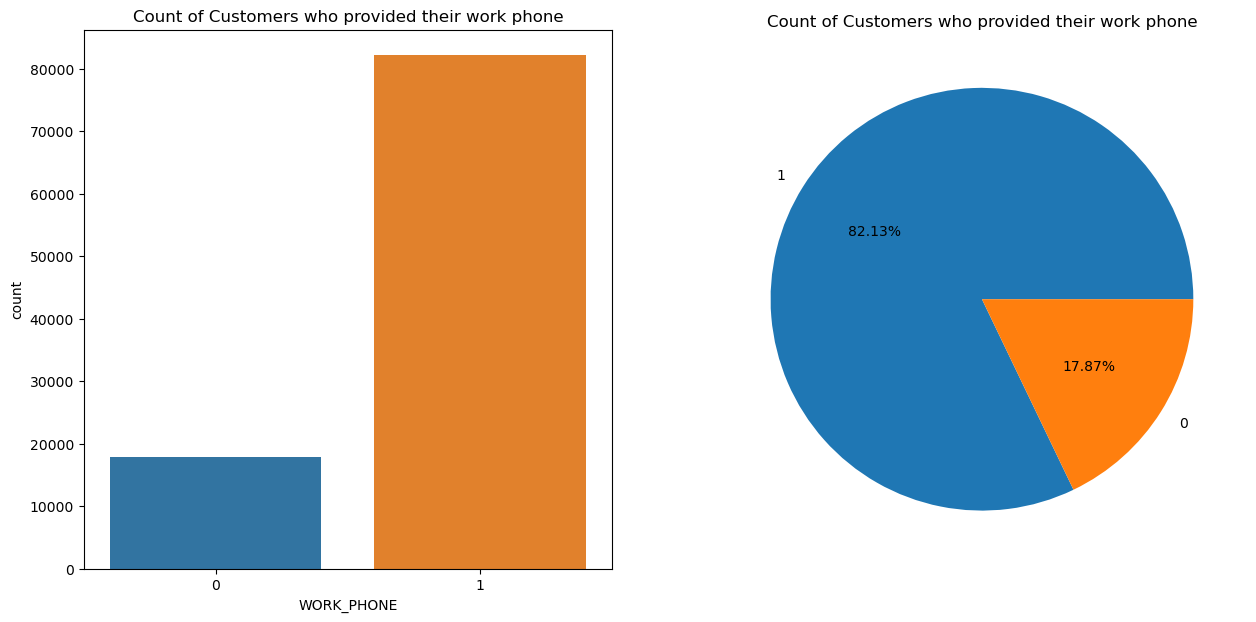

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers who provided their work phone") 
ax[1].set_title("Count of Customers who provided their work phone") 
percentage = df["WORK_PHONE"].value_counts()         
labels = list(df["WORK_PHONE"].value_counts().index) 
sns.countplot(x = df["WORK_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients have provided workphone, contributing to 82.13%.

### Analysis of HOME_PHONE column

In [28]:
get_info_cat('HOME_PHONE')

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is: 0
Number of missing values in HOME_PHONE is: 0


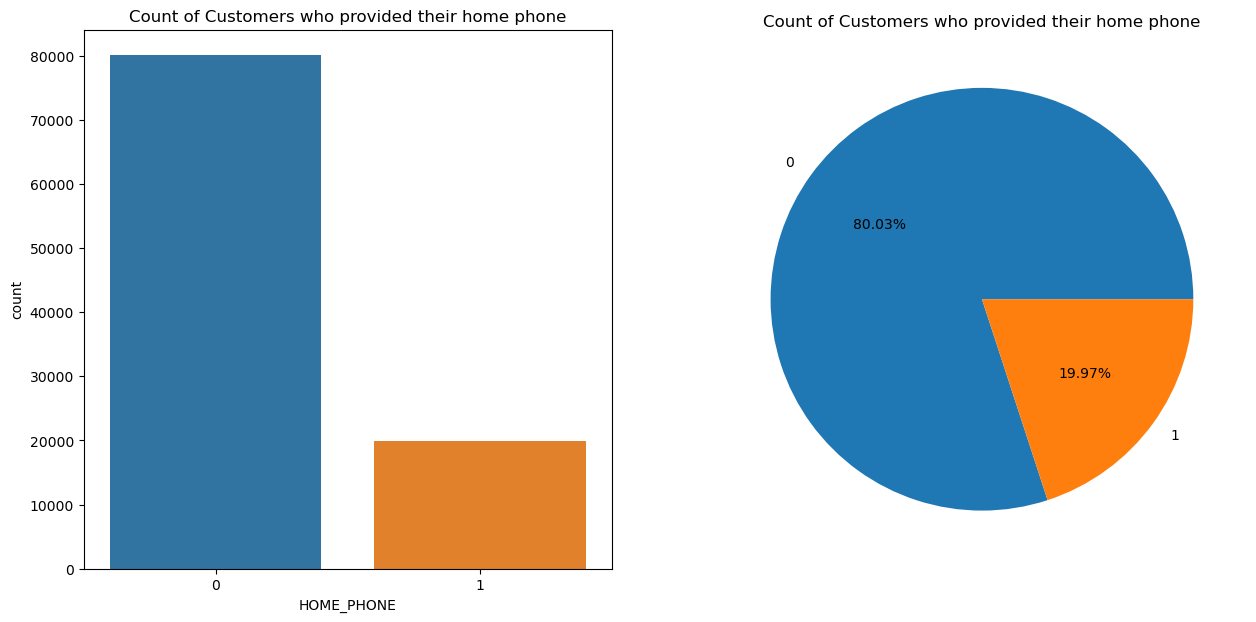

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers who provided their home phone") 
ax[1].set_title("Count of Customers who provided their home phone") 
percentage = df["HOME_PHONE"].value_counts()         
labels = list(df["HOME_PHONE"].value_counts().index) 
sns.countplot(x = df["HOME_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients have not provided their homephone, contributing to 80.03%.

### Analysis of FLAG_EMAIL column

In [30]:
get_info_cat('FLAG_EMAIL')

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is: 0
Number of missing values in FLAG_EMAIL is: 0


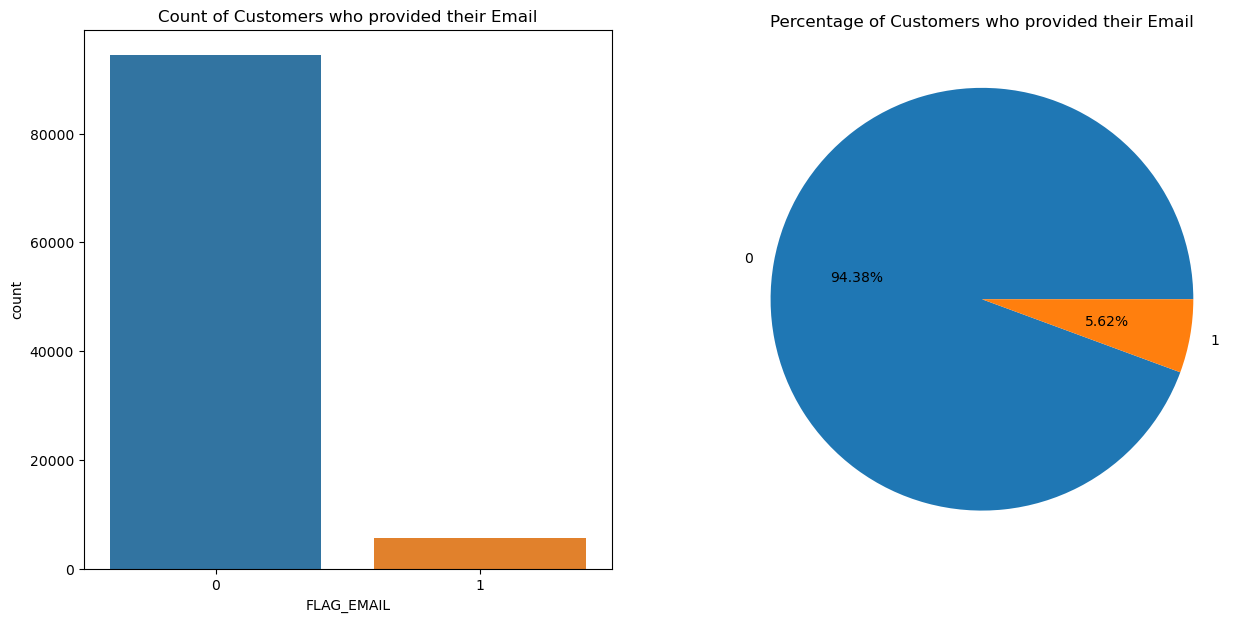

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Customers who provided their Email") 
ax[1].set_title("Percentage of Customers who provided their Email") 
percentage = df["FLAG_EMAIL"].value_counts()         
labels = list(df["FLAG_EMAIL"].value_counts().index) 
sns.countplot(x = df["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients have not provided their email, contributing to 94.38%.

### Analysis of OCCUPATION_TYPE column

In [32]:
get_info_cat('OCCUPATION_TYPE')

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is: Laborers
Number of missing values in OCCUPATION_TYPE is: 31224


In [33]:
# Replacing missing value by mode
occupation_type_mode = df.OCCUPATION_TYPE.mode()[0]
df["OCCUPATION_TYPE"].fillna(occupation_type_mode, inplace = True)

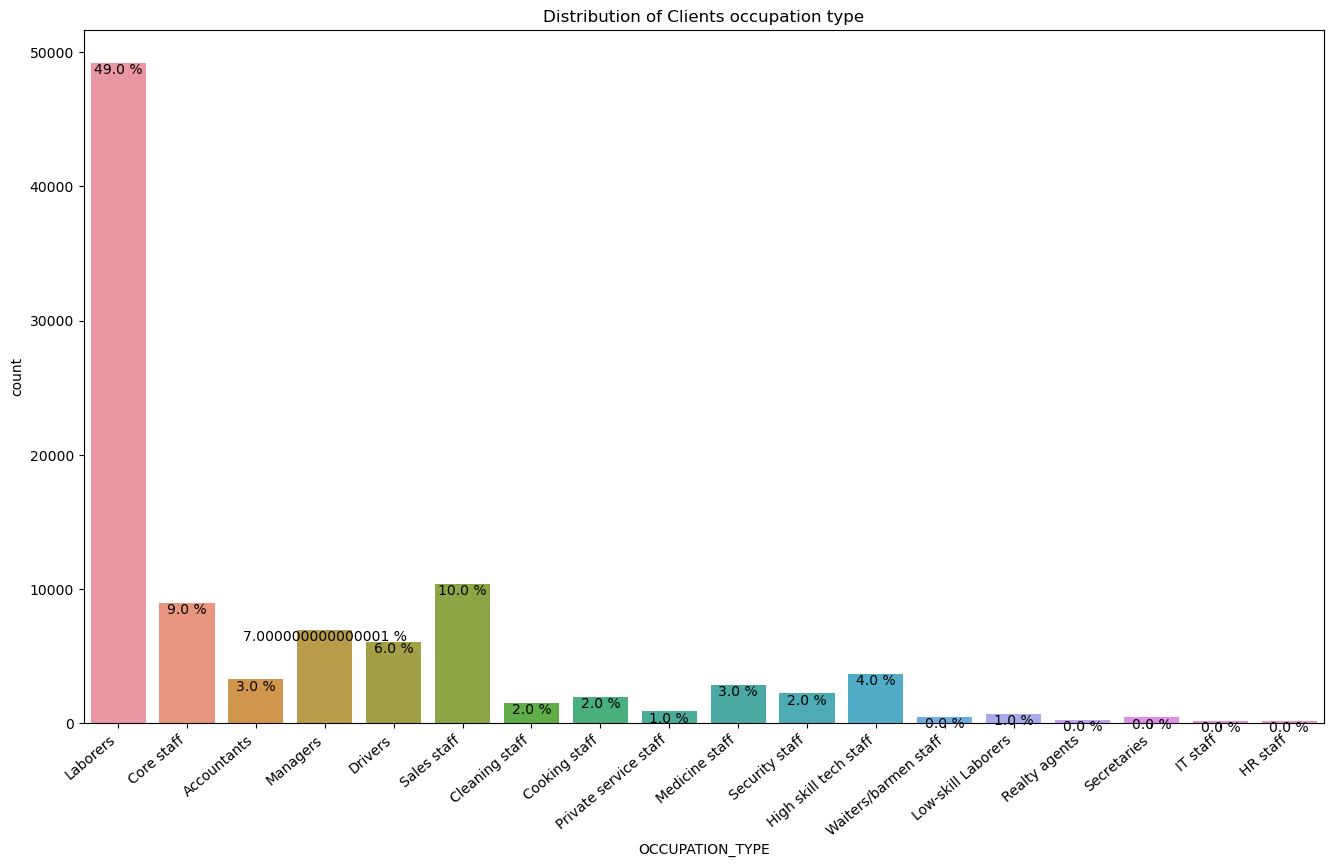

In [34]:
# Plot the graph-
fig, ax = plt.subplots(figsize= (16, 9))
ax = sns.countplot(x = df["OCCUPATION_TYPE"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")  
count = len(df["OCCUPATION_TYPE"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                               
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          
plt.title('Distribution of Clients occupation type')                                                                       
plt.show()

## ***Interpretation: Majority of clients Occupation type is Laborers, contributing to 49.0%.

### Analysis of CNT_FAM_MEMBERS column

In [35]:
get_info_cat('CNT_FAM_MEMBERS')

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is: 2.0
Number of missing values in CNT_FAM_MEMBERS is: 1


In [36]:
# Replacing missing value by mode
fam_members_mode = df.CNT_FAM_MEMBERS.mode()[0]
df["CNT_FAM_MEMBERS"].fillna(fam_members_mode, inplace = True)

2.0     51.722
1.0     21.810
3.0     17.161
4.0      7.965
5.0      1.158
6.0      0.139
7.0      0.031
8.0      0.008
9.0      0.002
10.0     0.002
13.0     0.001
14.0     0.001
Name: CNT_FAM_MEMBERS, dtype: float64


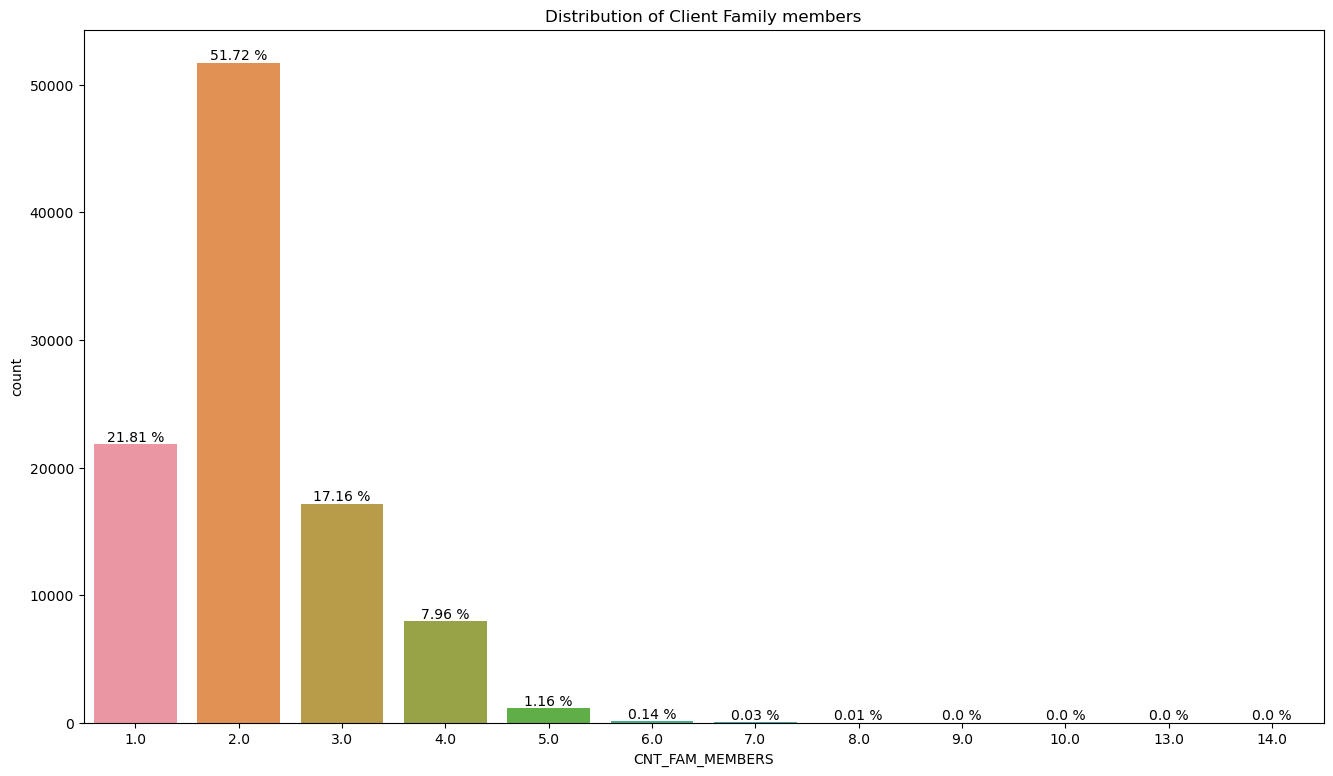

In [37]:
print((df["CNT_FAM_MEMBERS"].value_counts()/len(df))*100)               
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = df[ 'CNT_FAM_MEMBERS'], ax = ax)
for bar in ax.patches:                                                  
    percentage = f"{round((bar.get_height() /df.shape[0])*100 , 2)} %"  
                                                                            
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" ) 
plt.title('Distribution of Client Family members')
plt.show()

## ***Interpretation: Majority of clients have two family members, contributing to 51.72%.

### Analysis of APPLICATION_DAY column

In [38]:
get_info_cat('TOTAL_DOC_SUBMITTED')

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is: 1
Number of missing values in TOTAL_DOC_SUBMITTED is: 0


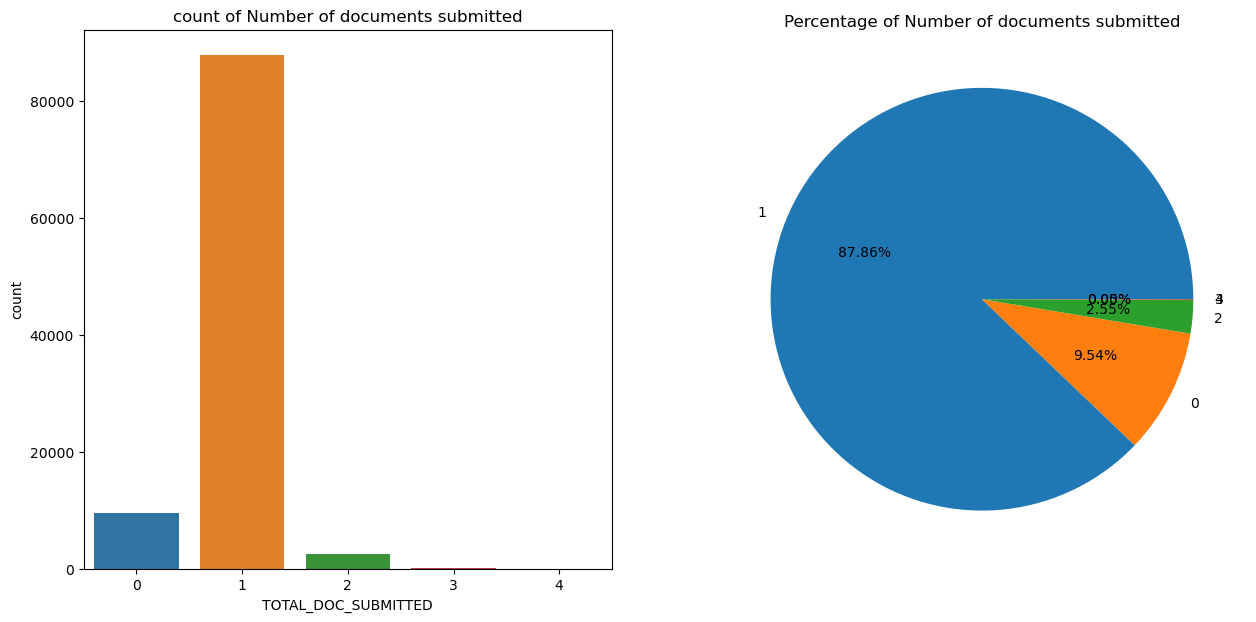

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("count of Number of documents submitted") 
ax[1].set_title("Percentage of Number of documents submitted") 
percentage = df["TOTAL_DOC_SUBMITTED"].value_counts()         
labels = list(df["TOTAL_DOC_SUBMITTED"].value_counts().index) 
sns.countplot(x = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## ***Interpretation: Majority of clients submitted 1 document, contributing to 87.86%

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 


In [40]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

### Analysis of SK_ID_CURR column

In [41]:
def get_info_num(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [42]:
get_info_num('SK_ID_CURR')

The mean of the SK_ID_CURR is 158006.14086
The median of the SK_ID_CURR is 157877.0
The mode of the SK_ID_CURR is 100002
The standard deviation of the SK_ID_CURR is 33481.16699608501
Number of missing values in the SK_ID_CURR is 0


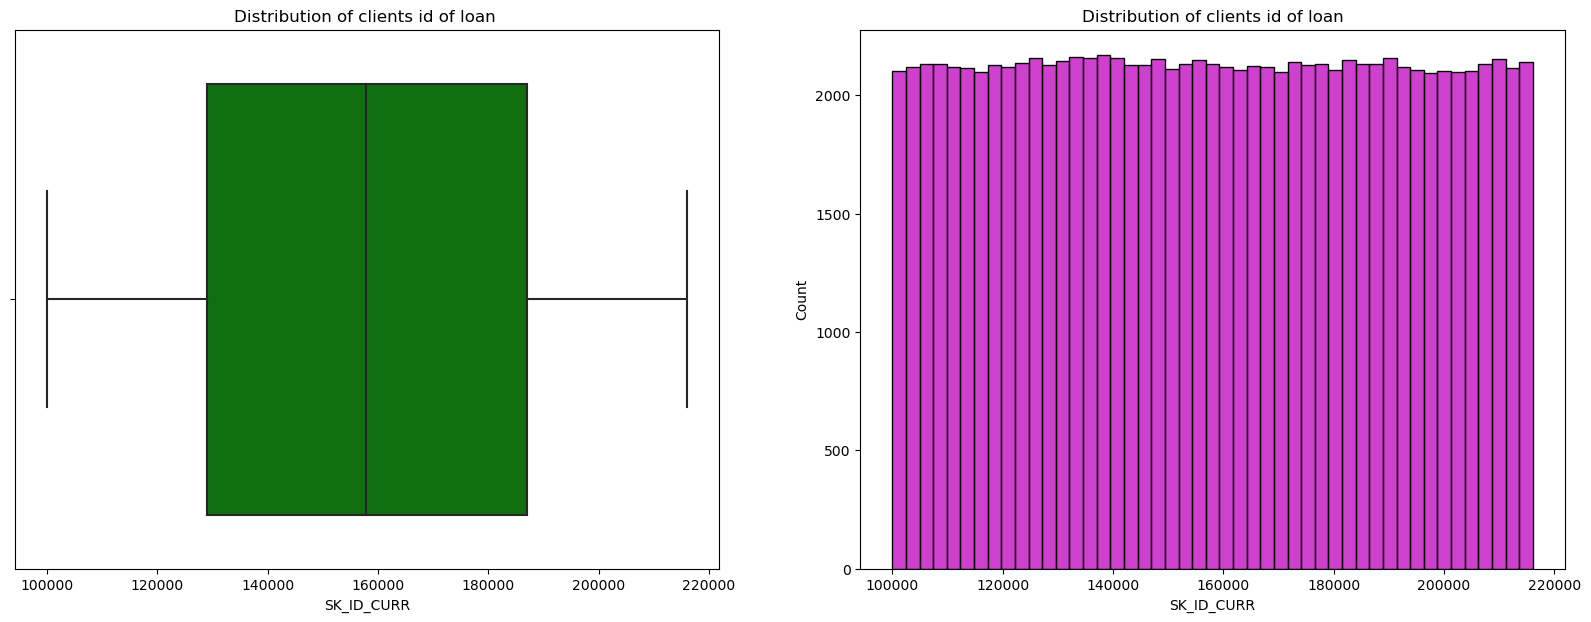

In [43]:
# Distribution of SK_ID_CURR
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["SK_ID_CURR"], ax =ax[1], color = "m") 
sns.boxplot(x = df["SK_ID_CURR"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of clients id of loan ") 
ax[1].set_title("Distribution of clients id of loan") 
plt.show()

### Analysis of AMT_INCOME_TOTAL column

In [44]:
get_info_num('AMT_INCOME_TOTAL')

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427718896
Number of missing values in the AMT_INCOME_TOTAL is 0


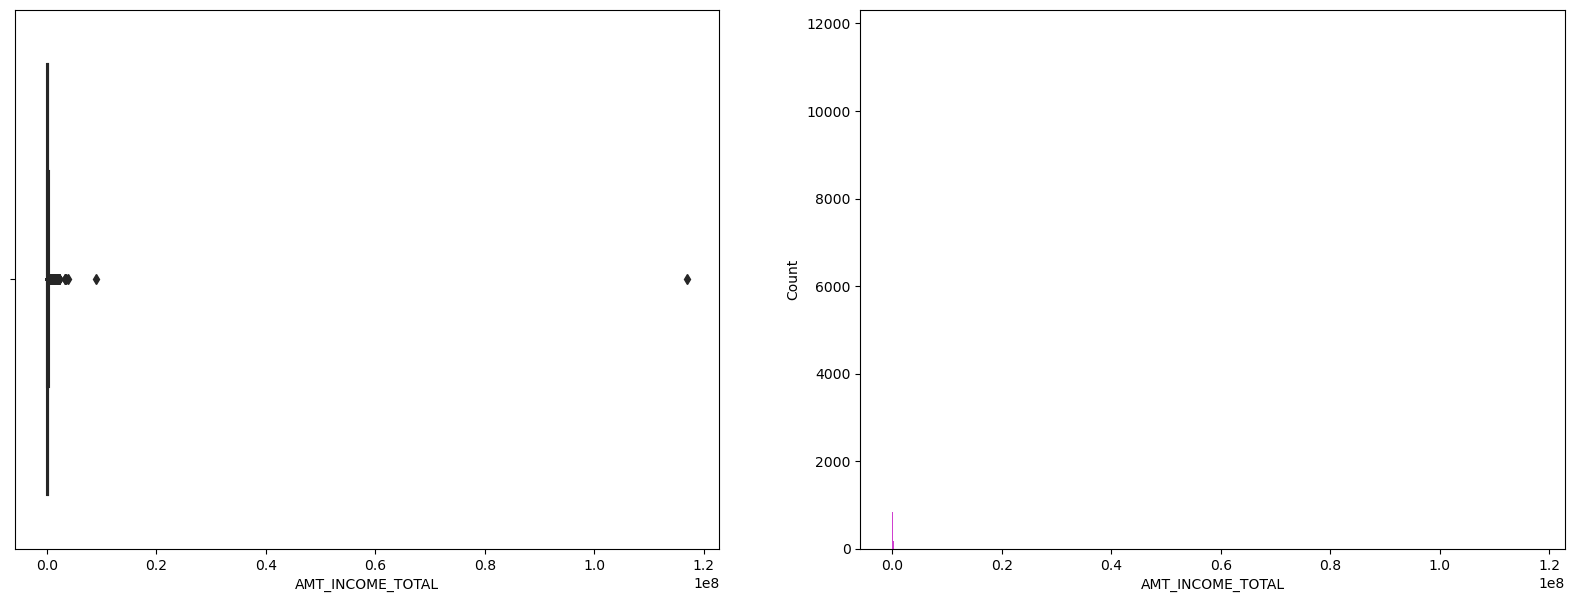

In [45]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") 
plt.show()

## As we can see there are outliers in the total income amount of clients, so we have to identify and remove the outlier

In [46]:
Q1=df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['AMT_INCOME_TOTAL']<lower_bound) | (df['AMT_INCOME_TOTAL']>upper_bound), 'AMT_INCOME_TOTAL']=np.nan

clean_value=df[(df['AMT_INCOME_TOTAL'].notnull())]['AMT_INCOME_TOTAL']
df['AMT_INCOME_TOTAL'].fillna(clean_value,inplace=True)

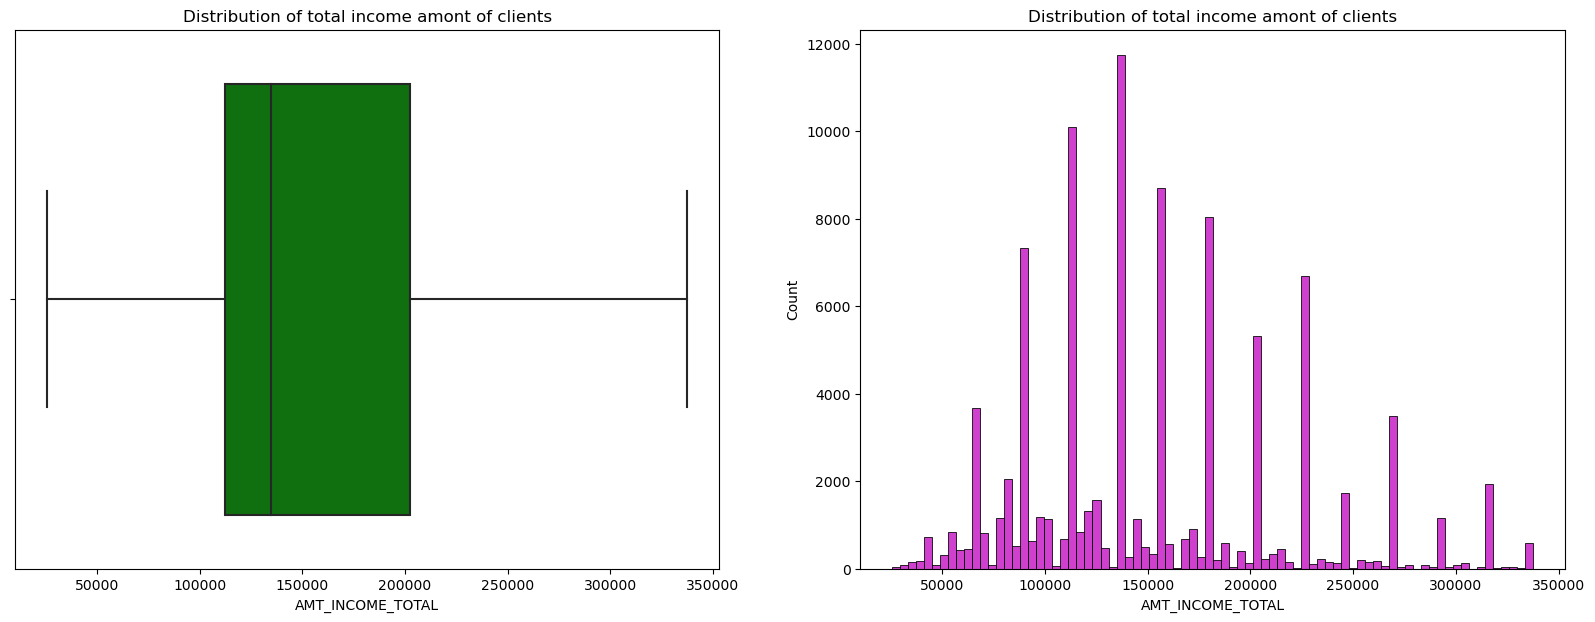

In [47]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_INCOME_TOTAL"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_INCOME_TOTAL"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of total income amont of clients") 
ax[1].set_title("Distribution of total income amont of clients") 
plt.show()

## ***INTERPRETATION: After removal of outlier by seeing the above graph we can conclude that majority of clients have a total income ranges from 100000 to 150000

### Analysis of AMT_CREDIT column

In [48]:
get_info_num('AMT_CREDIT')

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


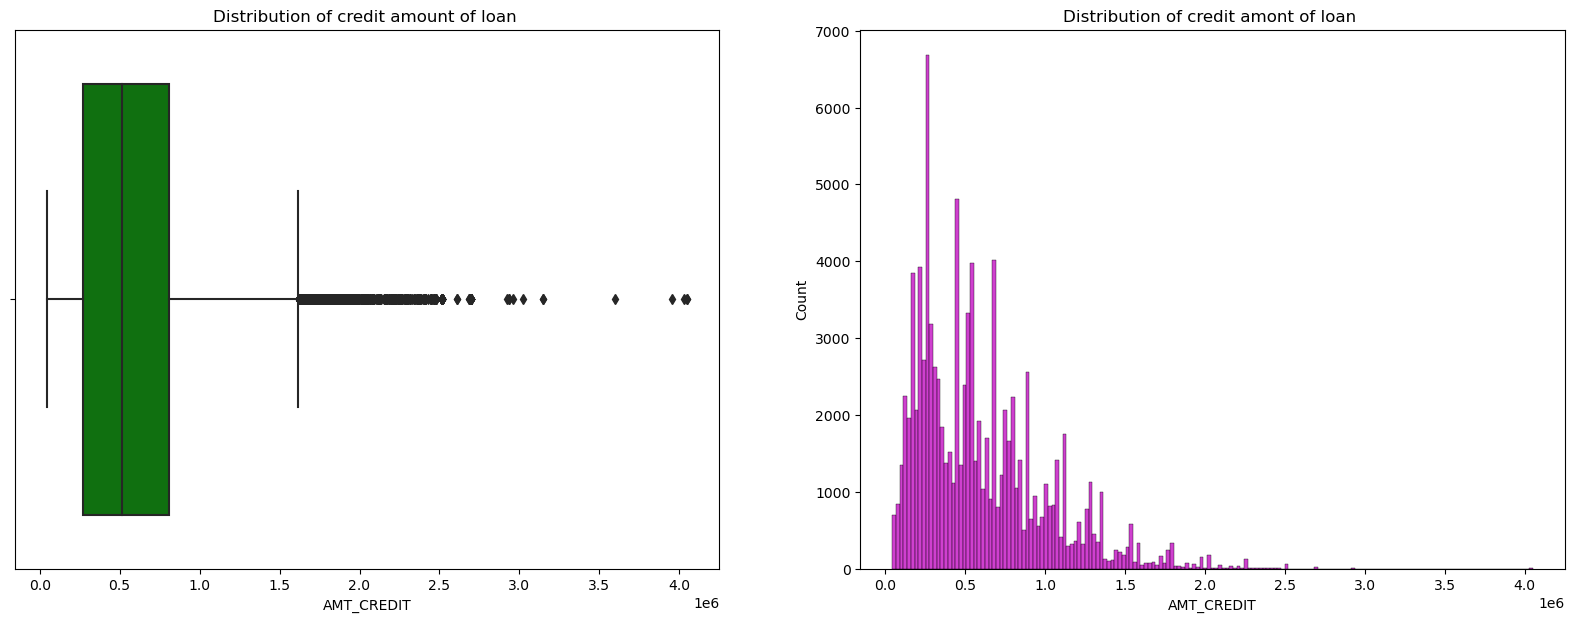

In [49]:
# Distribution of AMT_CREDIT
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of credit amount of loan ") 
ax[1].set_title("Distribution of credit amont of loan ") 
plt.show()

## As we can see there are outliers in the credit amount of loan of clients, so we have to identify and remove the outlier

In [50]:
Q1=df['AMT_CREDIT'].quantile(0.25)
Q3=df['AMT_CREDIT'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['AMT_CREDIT']<lower_bound) | (df['AMT_CREDIT']>upper_bound), 'AMT_CREDIT']=np.nan

clean_value=df[(df['AMT_CREDIT'].notnull())]['AMT_CREDIT']
df['AMT_CREDIT'].fillna(clean_value,inplace=True)

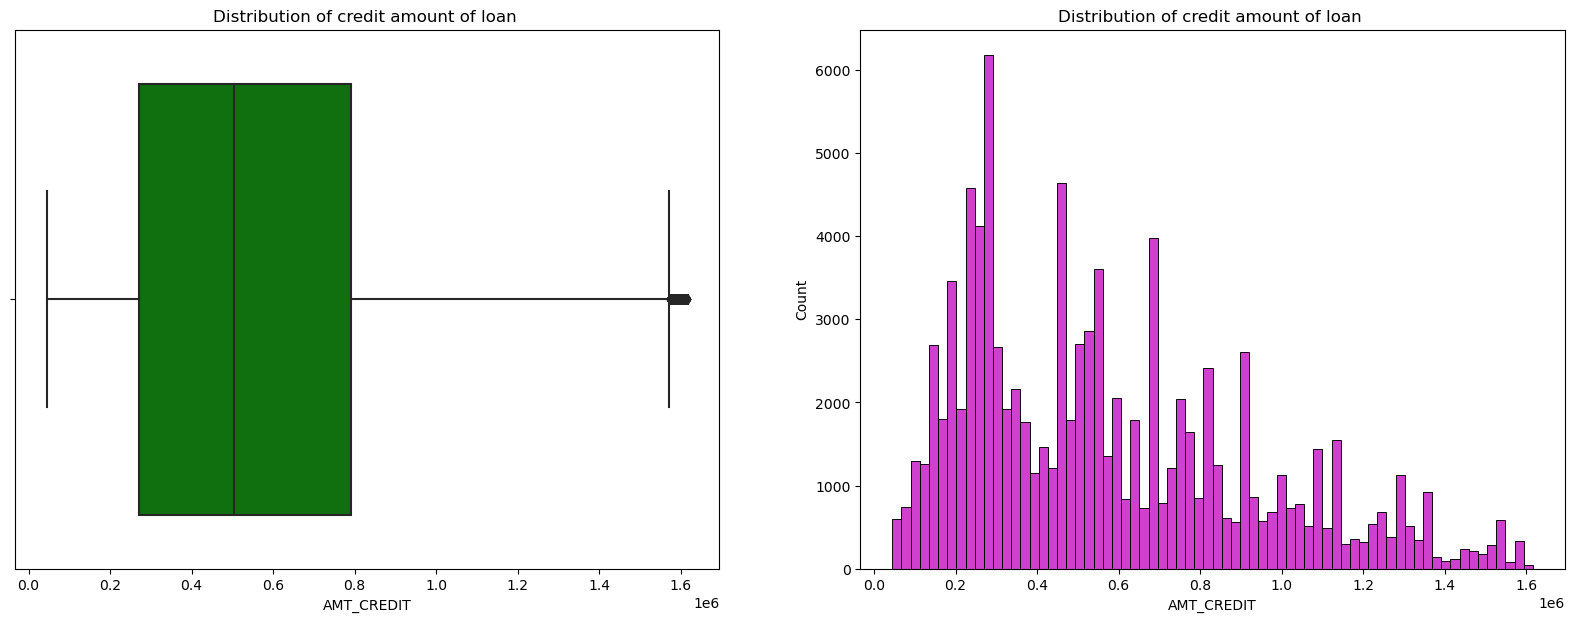

In [51]:
# Distribution of AMT_CREDIT
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_CREDIT"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_CREDIT"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of credit amount of loan ") 
ax[1].set_title("Distribution of credit amount of loan ") 
plt.show()

## ***INTERPRETATION: After removal of outlier by seeing the above graph we can conclude that majority of clients have a credit amount loan ranges between 0.2 to 0.4

### Analysis of AMT_GOODS_PRICE column

In [52]:
get_info_num('AMT_GOODS_PRICE')

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 81


In [53]:
# Replacing missing values with mean
goods_price_mode = df.AMT_GOODS_PRICE.mean()
df["AMT_GOODS_PRICE"].fillna(goods_price_mode, inplace = True)

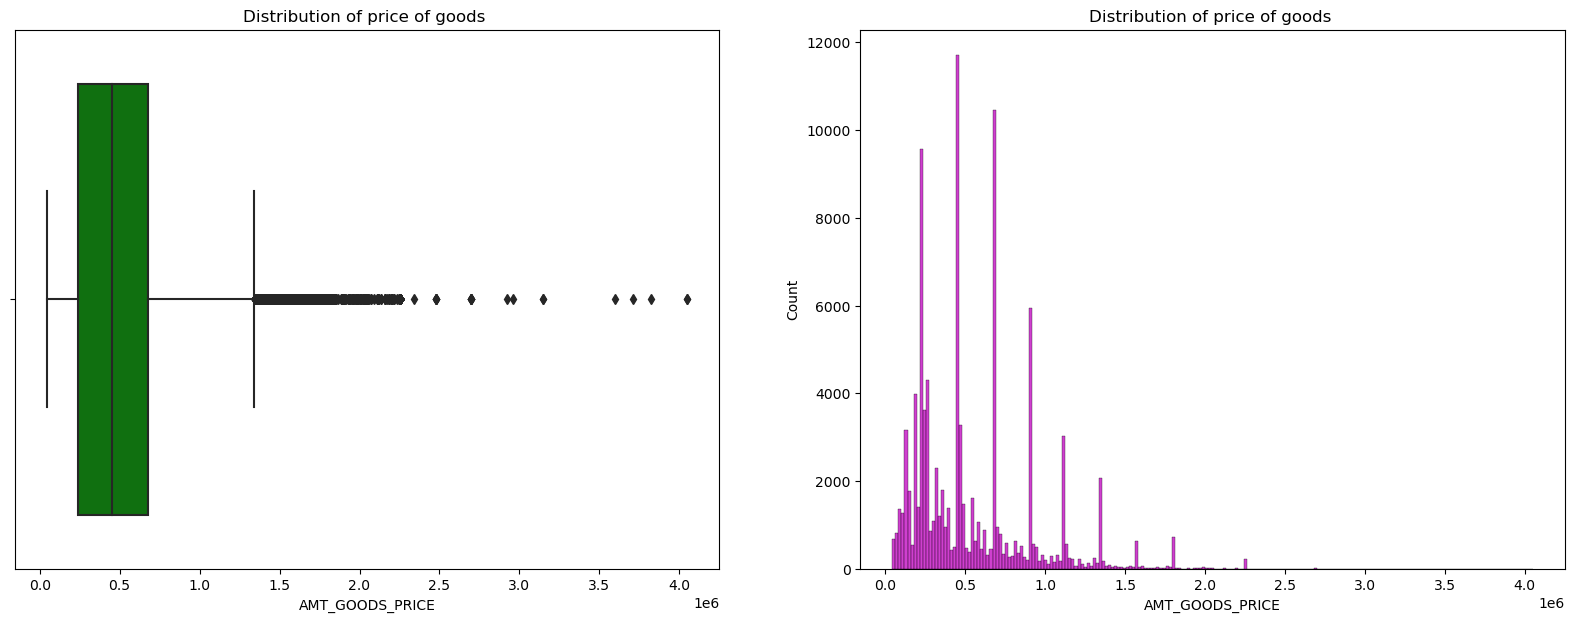

In [54]:
# Distribution of AMT_GOODS_PRICE
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of price of goods ") 
ax[1].set_title("Distribution of price of goods ") 
plt.show()

## As we can see there are outliers in the AMT_GOODS_PRICE of clients, so we have to identify and remove the outlier

In [55]:
Q1=df['AMT_GOODS_PRICE'].quantile(0.25)
Q3=df['AMT_GOODS_PRICE'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['AMT_GOODS_PRICE']<lower_bound) | (df['AMT_GOODS_PRICE']>upper_bound), 'AMT_GOODS_PRICE']=np.nan

clean_value=df[(df['AMT_GOODS_PRICE'].notnull())]['AMT_GOODS_PRICE']
df['AMT_GOODS_PRICE'].fillna(clean_value,inplace=True)

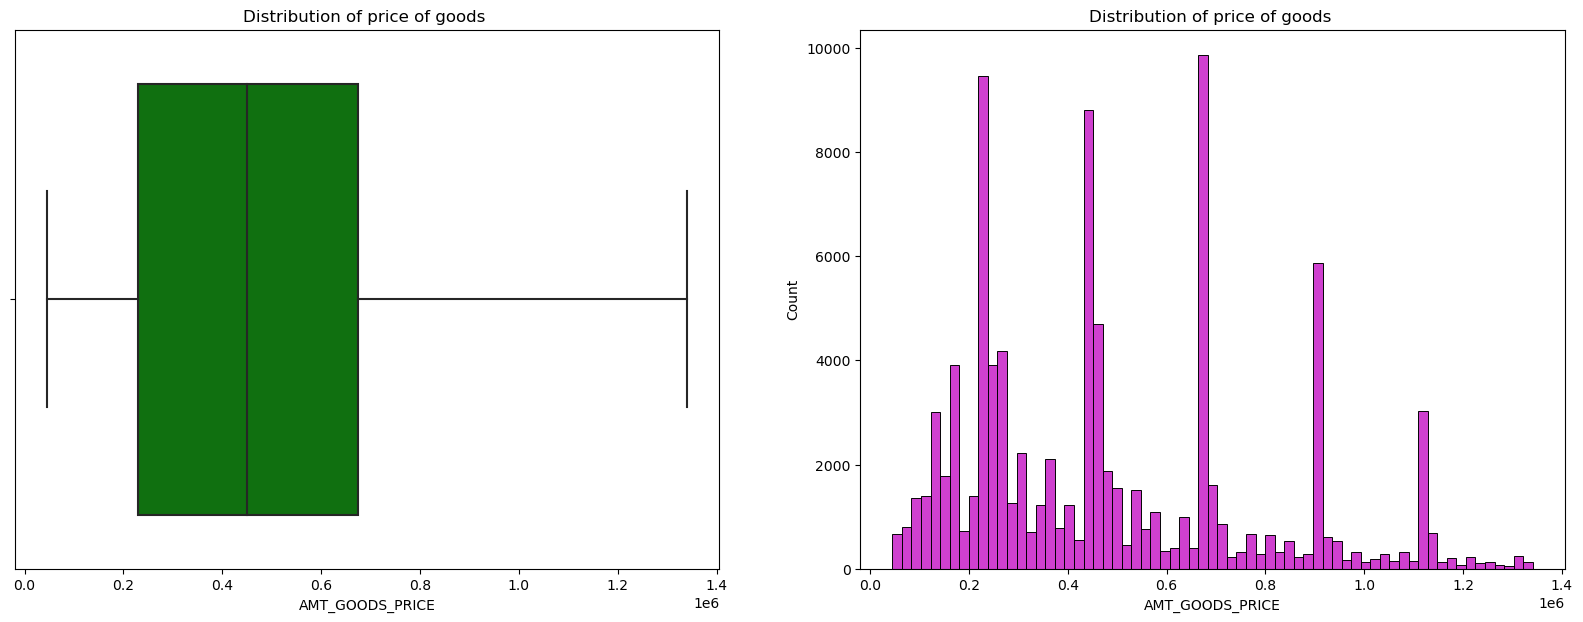

In [56]:
# Distribution of AMT_GOODS_PRICE
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["AMT_GOODS_PRICE"], ax =ax[1], color = "m") 
sns.boxplot(x = df["AMT_GOODS_PRICE"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of price of goods ") 
ax[1].set_title("Distribution of price of goods ") 
plt.show()

## ***INTERPRETATION: After removal of outlier by seeing the above graph we can conclude that most of the amount goods price ranges between 0.2 and 0.8

### Analysis of DAYS_EMPLOYED column

In [57]:
get_info_num('DAYS_EMPLOYED')

The mean of the DAYS_EMPLOYED is 63292.22206
The median of the DAYS_EMPLOYED is -1219.0
The mode of the DAYS_EMPLOYED is 365243
The standard deviation of the DAYS_EMPLOYED is 140839.69729599176
Number of missing values in the DAYS_EMPLOYED is 0


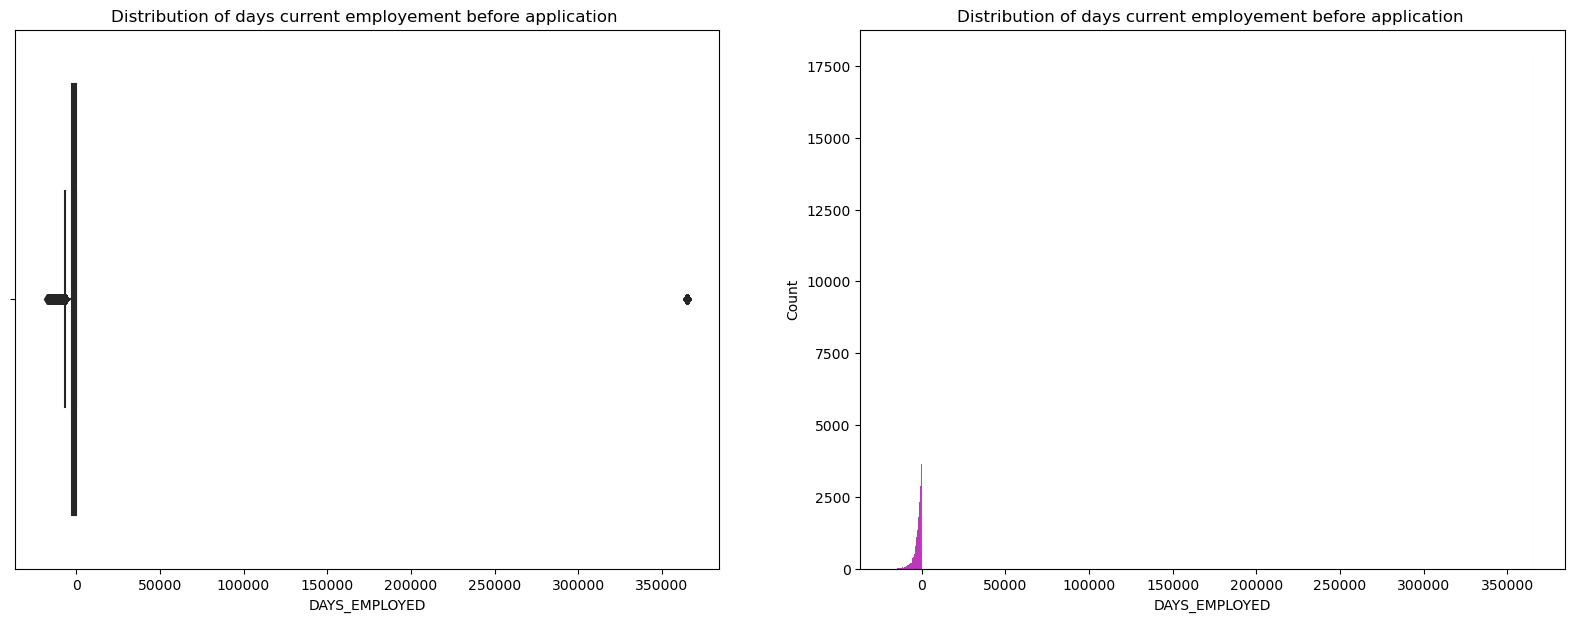

In [58]:
# Distribution of DAYS_EMPLOYED
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of days current employement before application ") 
ax[1].set_title("Distribution of days current employement before application ") 
plt.show()

## As we can see there are outliers in the DAYS_EMPLOYED of clients, so we have to identify and remove the outlier

In [59]:
Q1=df['DAYS_EMPLOYED'].quantile(0.25)
Q3=df['DAYS_EMPLOYED'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['DAYS_EMPLOYED']<lower_bound) | (df['DAYS_EMPLOYED']>upper_bound), 'DAYS_EMPLOYED']=np.nan

clean_value=df[(df['DAYS_EMPLOYED'].notnull())]['DAYS_EMPLOYED']
df['DAYS_EMPLOYED'].fillna(clean_value,inplace=True)

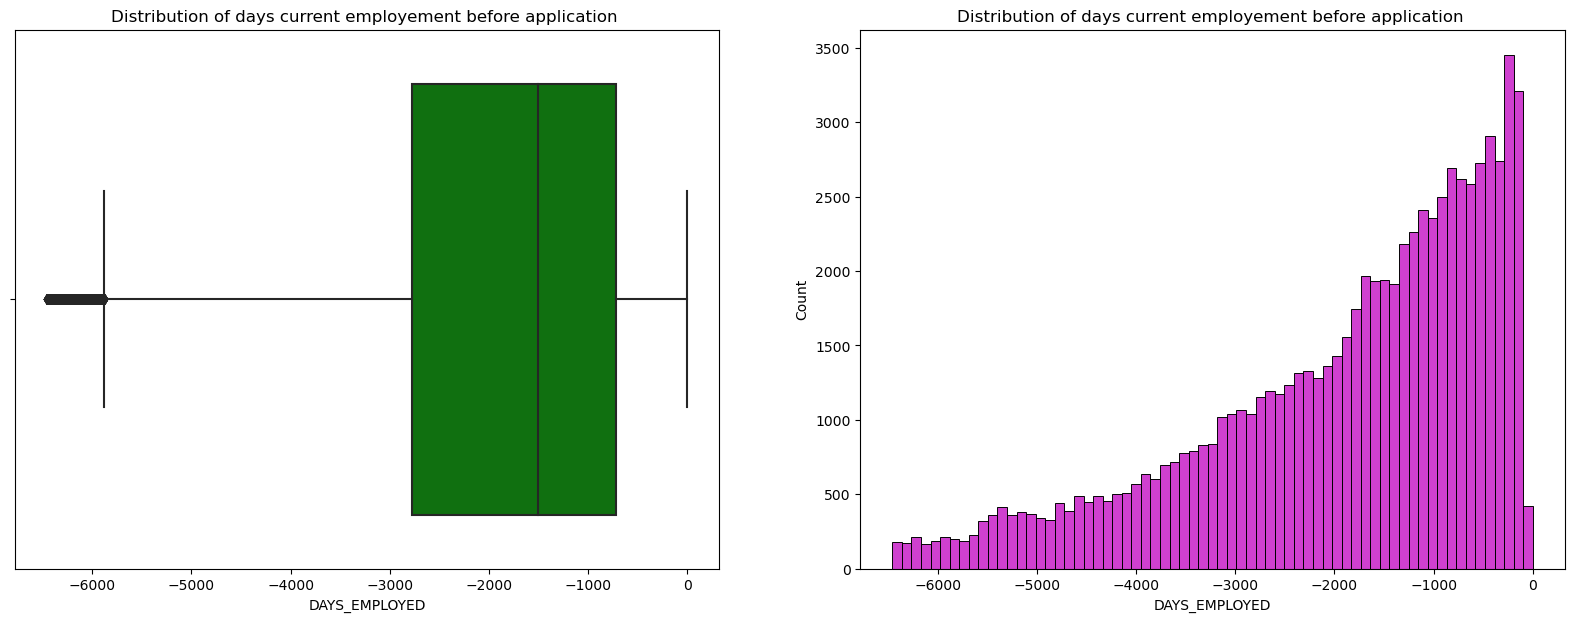

In [60]:
# Distribution of DAYS_EMPLOYED
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["DAYS_EMPLOYED"], ax =ax[1], color = "m") 
sns.boxplot(x = df["DAYS_EMPLOYED"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of days current employement before application ") 
ax[1].set_title("Distribution of days current employement before application ") 
plt.show()

## ***INTERPRETATION: This is the graph After removal of outlier

# Levels for Data Exploration

* Level 2 : Bi-Variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from data 

## Level 2 Analysis

#### The below are the available list of columns/features in the given data.

In [61]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## Relationship of Target with NAME_CONTRACT_TYPE

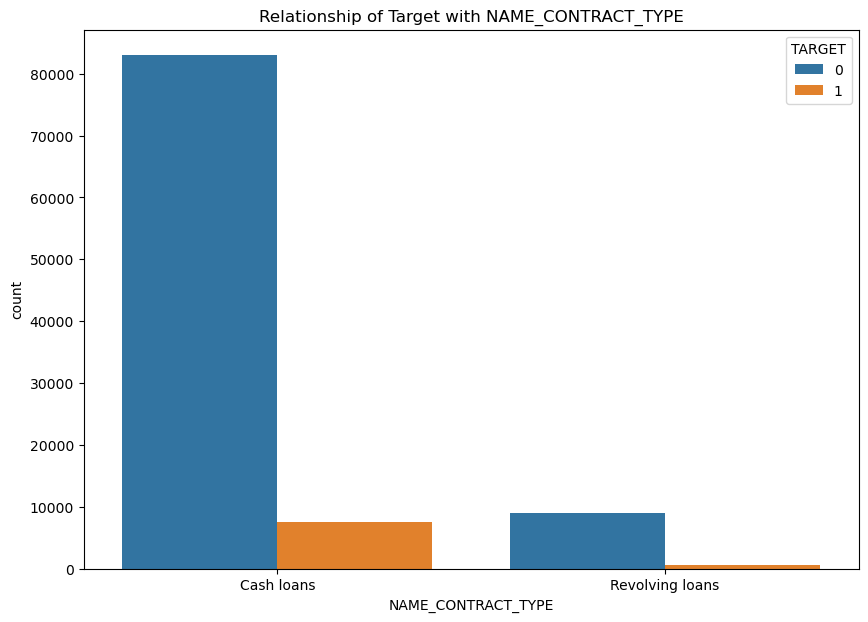

In [62]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df)
plt.title('Relationship of Target with NAME_CONTRACT_TYPE')
plt.show()

### INTERPRETATION: By observing the above graph it is seen that in the category cash loan the number of clients with payment difficulties is more as compared to Revolving loans.
### This observation suggests that clients with cash lone may have higher likelihood to be a defaulter

## Relationship of Target with GENDER

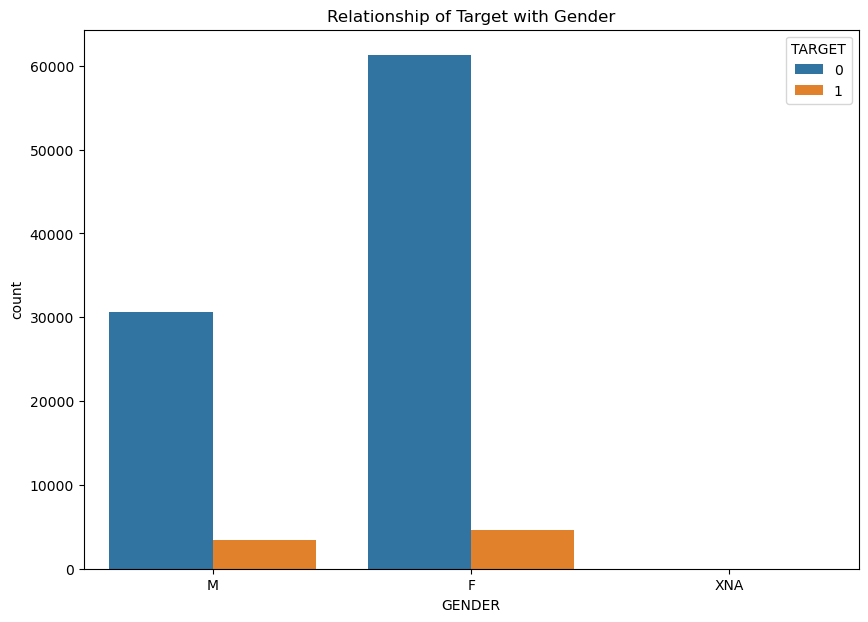

In [63]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "GENDER", hue = "TARGET", data = df)
plt.title('Relationship of Target with Gender')
plt.show()

### INTERPRETATION: By observing the above graph it is seen that Female clients with payment difficulties is more as compared to Revolving loans.
### This observation suggests that Female clients  may have higher likelihood to be a defaulter

## Relationship of Target with NAME_INCOME_TYPE

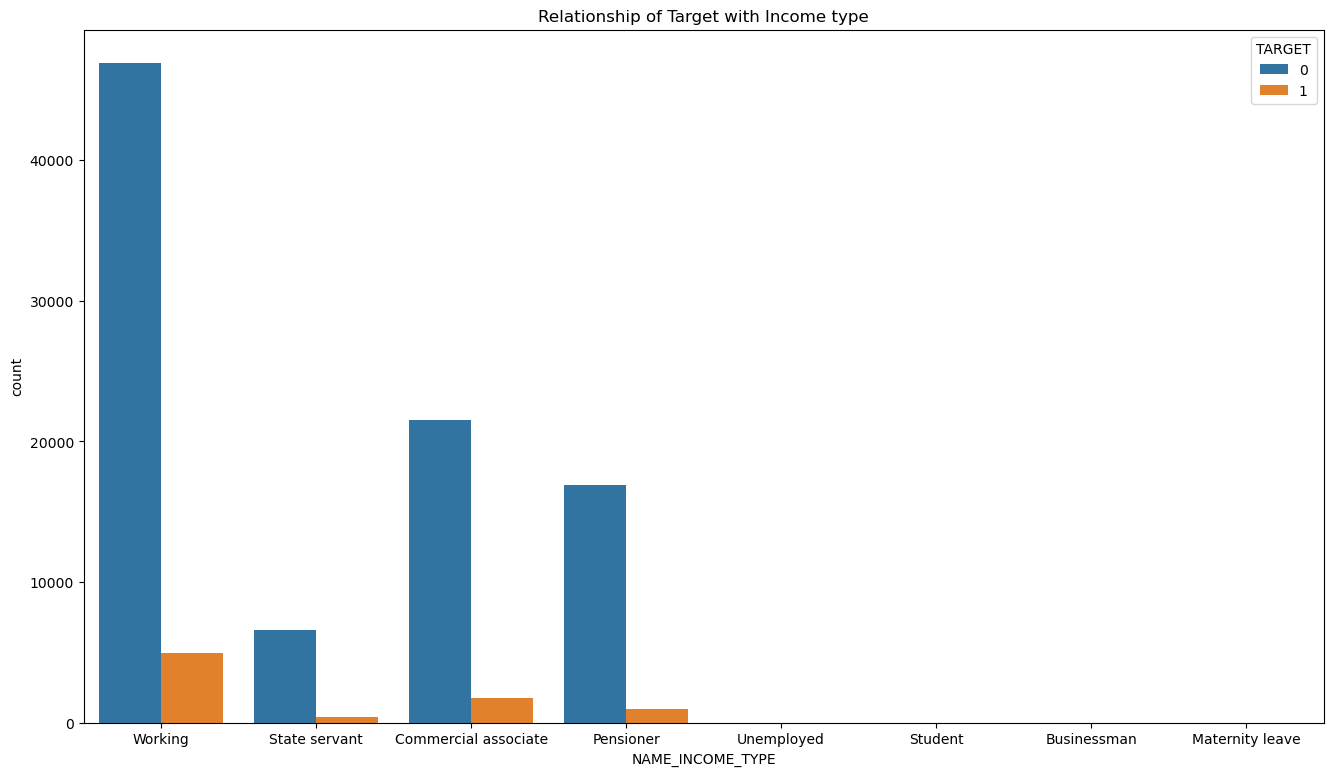

In [64]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df)
plt.title('Relationship of Target with Income type')
plt.show()

### INTERPRETATION: By observing the above graph it is seen that among clients who have 'working' as their income type have more number of clients with payment difficulties.
### This observation suggests that clients with income type 'working' may have higher likelihood to be a defaulter

## Relationship of Target with NAME_EDUCATION_TYPE

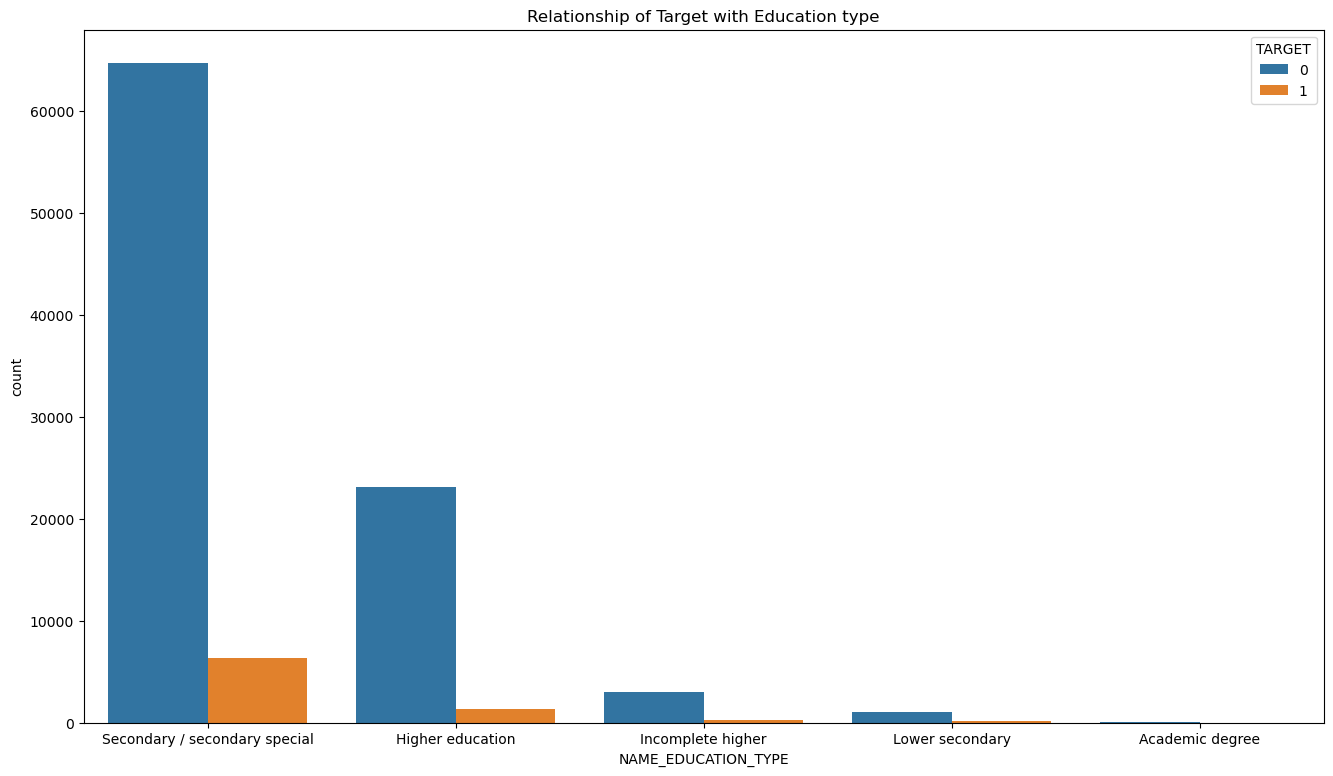

In [65]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df)
plt.title('Relationship of Target with Education type')
plt.show()

### ***INTERPRETATION: As we can see in above graph clients with Secondary/secondary special education type has more number of people with payment difficulties.
### This observation suggests that clients with secondary education have more liklihood to be a defaulter

## Relationship of Target with HOME_PHONE

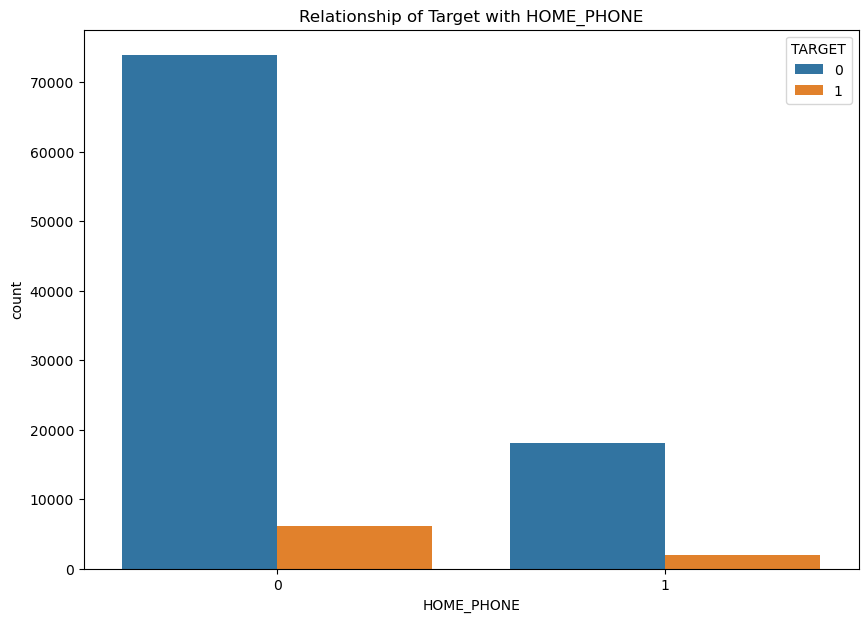

In [66]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "HOME_PHONE", hue = "TARGET", data = df)
plt.title('Relationship of Target with HOME_PHONE')
plt.show()

### ***INTERPRETATION: By observing the above graph we can see that among clients who haven't provided their home phone number has more number of clients with payment difficulties.
### This observation suggest that clients who have not provided their home phone number is more loklihood to be a defaulter

## Relationship of Target with FLAG_EMAIL


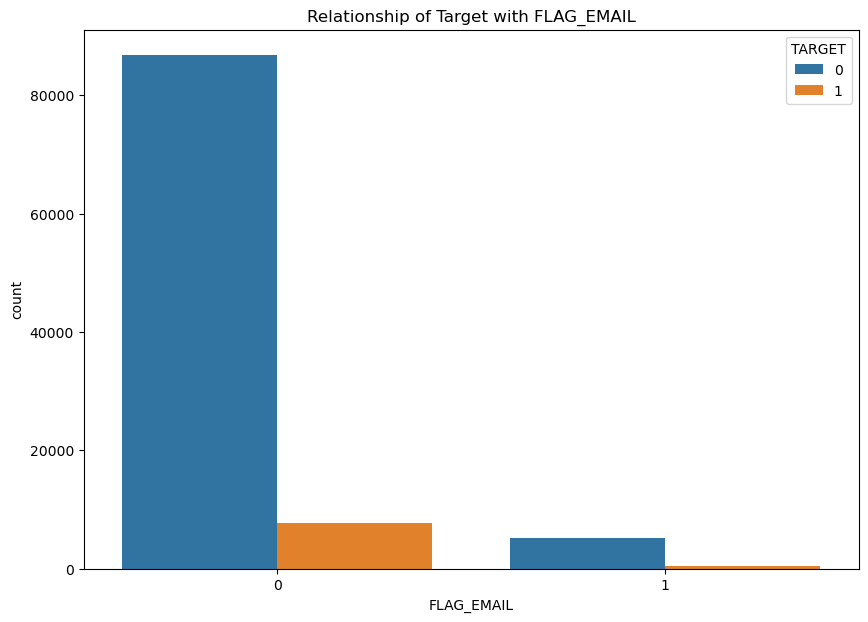

In [67]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "FLAG_EMAIL", hue = "TARGET", data = df)
plt.title('Relationship of Target with FLAG_EMAIL')
plt.show()

### ***INTERPRETATION: By observing the above graph we can see that among clients who haven't provided their email has more number of clients with payment difficulties.
### This observation suggest that clients who have not provided their email is more loklihood to be a defaulter

## Relationship of Target with OCCUPATION_TYPE

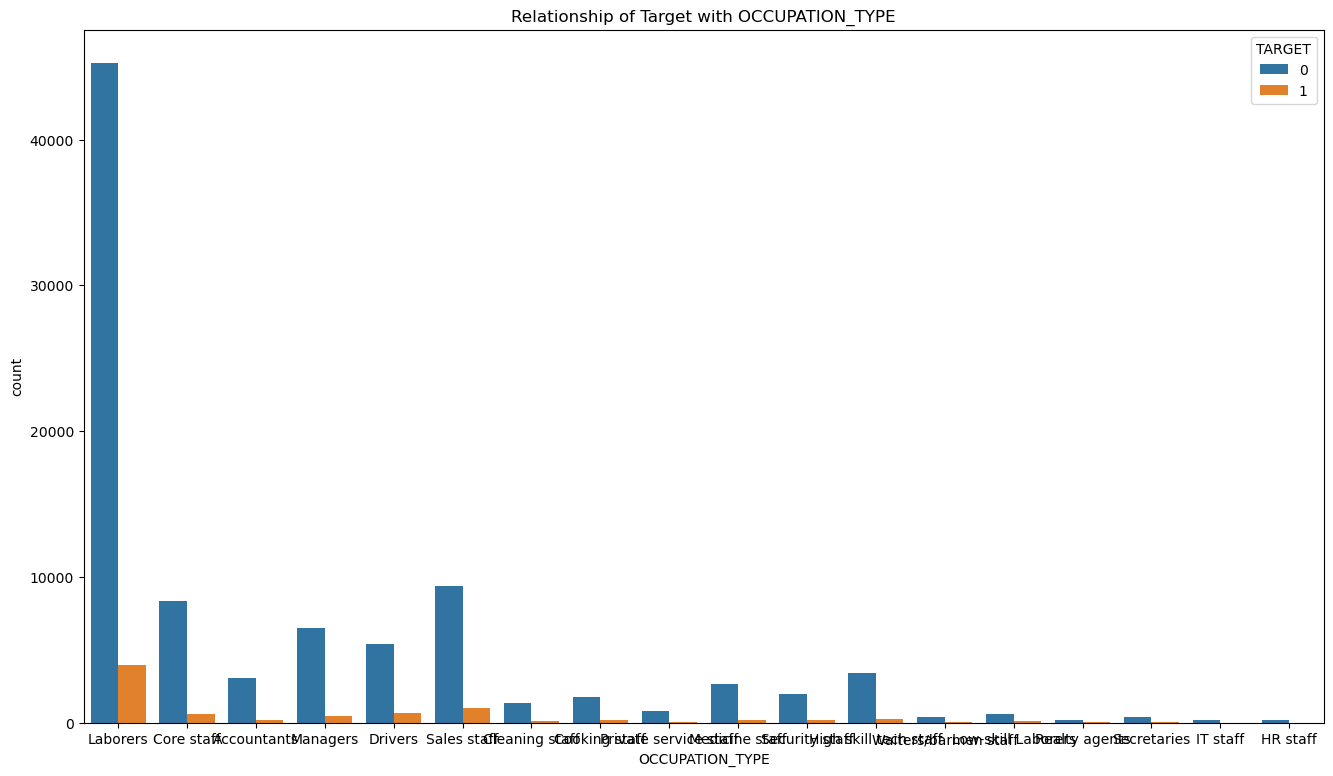

In [68]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.countplot(x = "OCCUPATION_TYPE", hue = "TARGET", data = df)
plt.title('Relationship of Target with OCCUPATION_TYPE')
plt.show()

### ***INTERPRETATION: By observing the above graph it is evident that clients whose occupation type is Laborers have more payment difficulty than others.
### This  observation suggest that client having occupation type as Laborers have more likelihood to be a defaulter.

## Relationship of Target with TOTAL_DOC_SUBMITTED

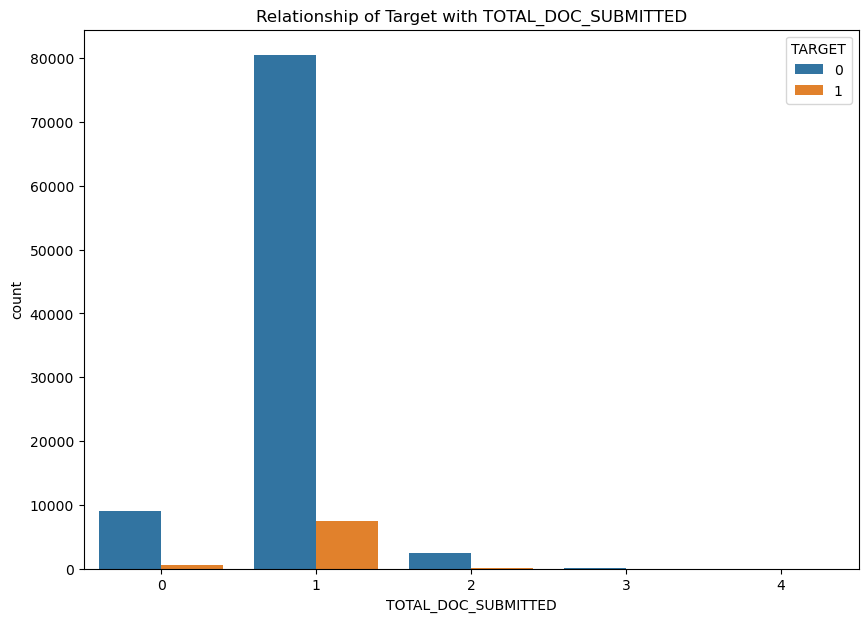

In [69]:
fig, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data = df)
plt.title('Relationship of Target with TOTAL_DOC_SUBMITTED')
plt.show()

### ***INTERPRETATION: By observing the above graph it is seen that clients who have submitted only 1 document have more payment difficulties.
### This  observation suggest that client who have submitted only 1 document have more likelihood to be a defaulter.

# CAT NUM ANALYSIS: Categorical to continuous

In [70]:
continuous

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED']

## Relationship of Target with AMT_INCOME_TOTAL

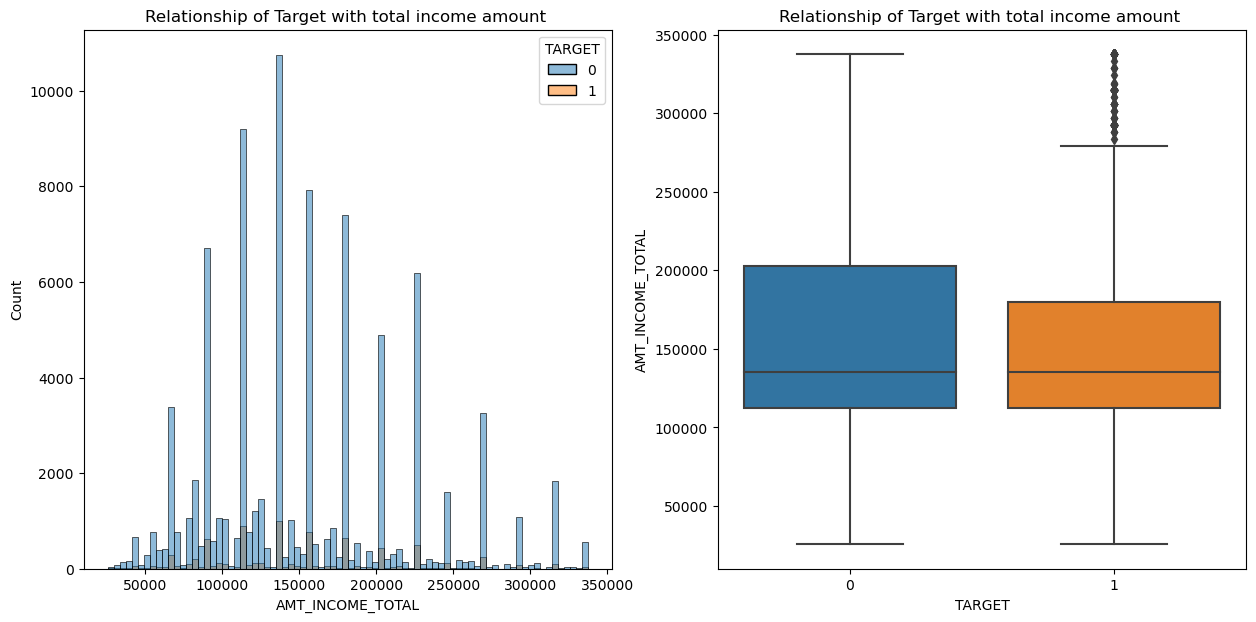

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_INCOME_TOTAL"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_INCOME_TOTAL"], x = df["TARGET"], ax = ax[1])
ax[0].set_title("Relationship of Target with total income amount ") 
ax[1].set_title("Relationship of Target with total income amount ") 
plt.show()

### ***INTERPRETATION: As per the above graph client who have total income between 100000 and 200000 have payment difficulty.
### This observation shows that clients having total income ranges from 100000 to 200000 have most likelihood to be a defaulter

## Relationship of Target with AMT_CREDIT

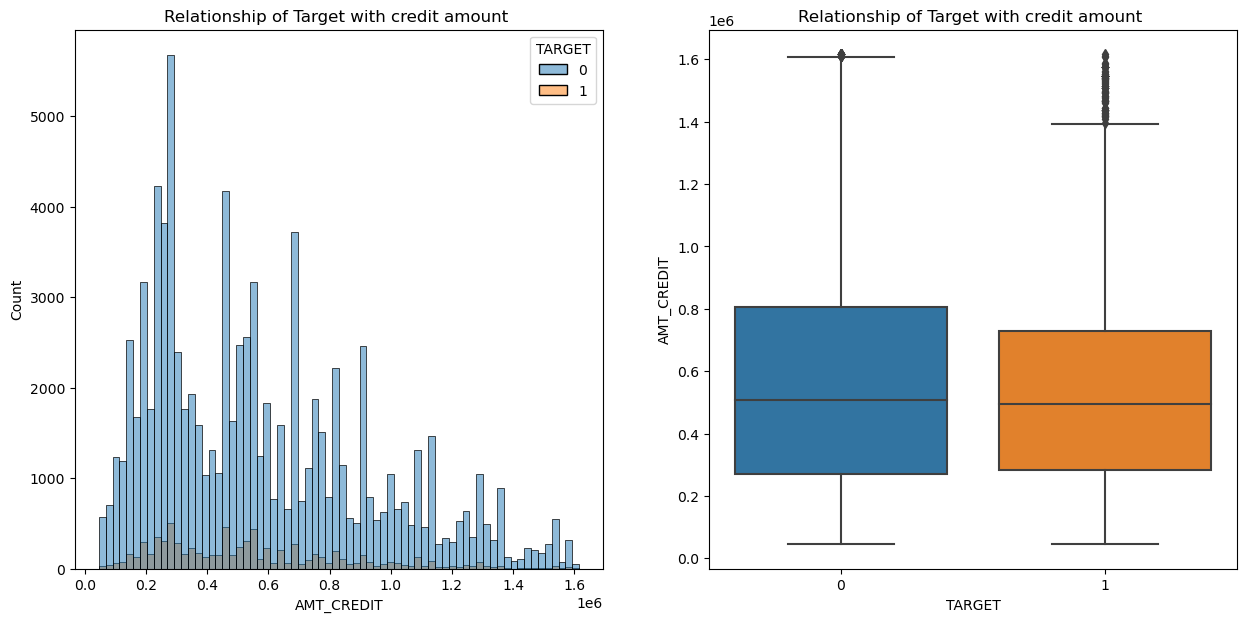

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_CREDIT"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_CREDIT"], x = df["TARGET"], ax = ax[1])
ax[0].set_title("Relationship of Target with credit amount ") 
ax[1].set_title("Relationship of Target with credit amount ") 
plt.show()

### Above graph shows the realtionship of Target with credit amount

## Relationship of Target with DAYS_EMPLOYED

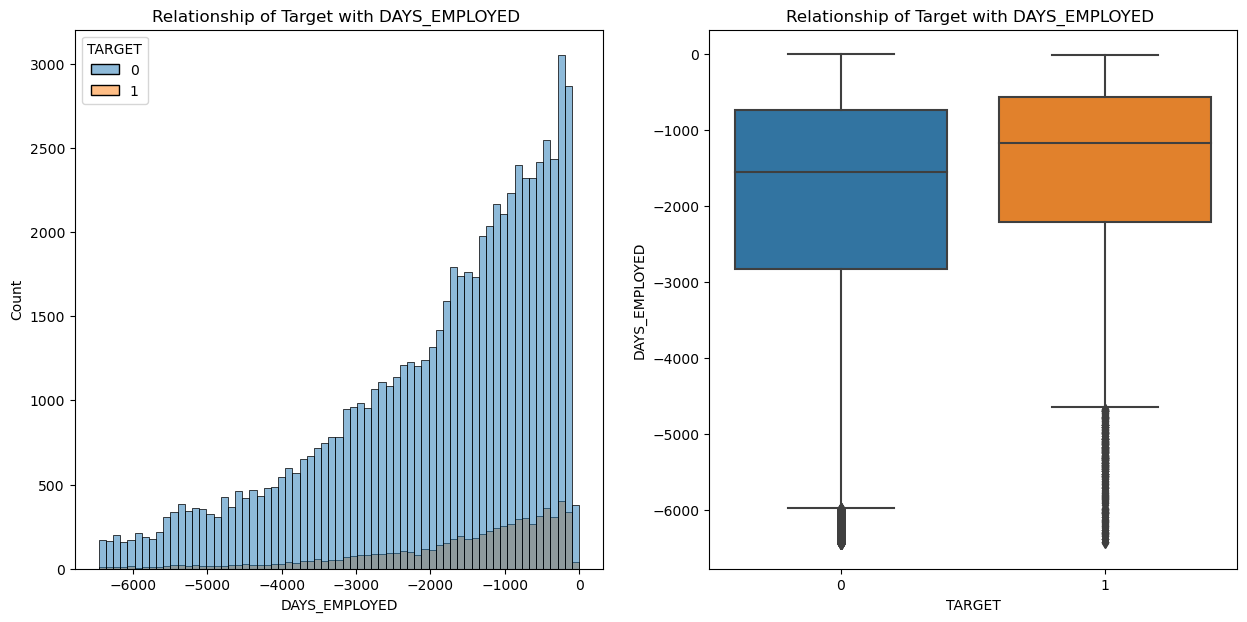

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["DAYS_EMPLOYED"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["DAYS_EMPLOYED"], x = df["TARGET"], ax = ax[1])
ax[0].set_title("Relationship of Target with DAYS_EMPLOYED ") 
ax[1].set_title("Relationship of Target with DAYS_EMPLOYED ") 
plt.show()

# CONCLUSION

## Based on the analysis, it can be concluded that customers with cash loans, females, working individuals, laborers, clients who have submitted only one document and client whose total income salary ranges between 100000 and 200000 have a higher liklihood of becoming defaulters.
## To identify customers with a lower probability of defaulting, Gold Atlantis should carefully evaluate these factors.
## By considering these patterns the firm can lower the risk of defaulters and make decisions during loan approval process